# <font color = "Indigo">Telecom Customer Attrition Analysis Using DataWig</font>

 - Saurabh Vyawahare
 - Bhavya Parmar
 - Aniket Patole

## <font color = "Blue-White"> Business problem overview </font>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

## <font color = "Blue- white"> Business Objective</font>

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.


## <font color = "Blue- white"> Approach</font>

we have dataset that contains data of telecom company customers that are in different phases.the good phase indicates that customer is happy about the company services.second phase is action phase where customer is having different issues with the company services and the third phase is where customer wants to leave or has already left the telecom company because of its issues. We have to find the new features that shows the churn nature of customer and how we can retain the high value customers.


We can use dimentionalty reduction method like PCA but we have to use another model which helps us to identifying important predictor attributes which help to understand indicators of churn.




## <font color = "Blue-White"> DataWig Information</font>

In our telecom churn analysis project, handling missing data is a critical step. Rather than simply dropping columns or filling missing values with basic methods like the mean or median, we are using Datawig because it offers a more sophisticated and data-driven approach to imputation.

Datawig leverages deep learning models to learn the complex relationships between features in our dataset, allowing it to make informed predictions for missing values. This is particularly important in telecom datasets, where customer behaviors can be non-linear and dependent on various features. Traditional imputation methods may fail to capture these intricate patterns, leading to biased or inaccurate imputations.

By using Datawig:

We preserve valuable data that might otherwise be lost through column/row deletion.
We improve the quality of our dataset, ensuring that the imputed values reflect true customer behavior.
Datawig is capable of handling multiple data types (e.g., numerical and categorical), making it ideal for our dataset, which contains a mix of both.
Finally, its flexibility and scalability allow it to be integrated into our feature engineering process, providing a more robust foundation for our downstream predictive models.

## <font color = "Blue-White"> Steps Followed :</font>

   - Data Understanding
   - Data cleaning 
   - Exploratory Data Analysis
   - Feature Engineering
   - Future Work
   
We will have insights of every steps as we go thorugh it.

## <font color = "Green"> Data Understanding</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
from datawig import SimpleImputer

In [3]:
pd.options.mode.use_inf_as_na = True

pd.options.display.expand_frame_repr =  False

%matplotlib inline

Now we can import the dataset to understand it.

In [4]:
telecom_data = pd.read_csv(r"C:\Users\Bhavya's Surface\Documents\NEU\SEM 3\ADS\telecom_churn_data.csv", low_memory = False, skipinitialspace = True)

telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
telecom_data.shape

(99999, 226)

## <font color = "purple"> Insights: </font>

we have 99999 rows and 226 coloumns. Now lets find out the missing values in our dataset.

In [6]:
print("Total NULL Values in each columns\n")
print(telecom_data.isnull().sum())

Total NULL Values in each columns

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64


This shows number of missing values in our dataset.Let's find out percentage of these missing values so that we can treat the these values well.


In [7]:
(telecom_data.isnull().sum()/ len(telecom_data)) * 100


2024-10-20 18:24:24,096 [INFO]  NumExpr defaulting to 8 threads.


mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

## <font color = "purple"> Insights: </font>

From this we can see the percantage of these missing values.we can see few coloumns have missing values in the range of **0% - 7%** which should not be a problem(for now).but some of these columns shows missing values upto **75%** which is too high.

We can drop these coloumns which shows missing valus percentage **more than 70 %**. (we will see this later.)

But the main customers for the telecom company is **High Value customers** which are only about 20% but they are part of 80% of companies revenue.That is the reason why we can not drop the recharge coloumn which gives us idea about these High Value customers.

Following are the recharge coloums which shows more than 70% of missing values but are important.

 - total_rech_data_6 - 74.8467 % missing values
 - total_rech_data_7 - 74.4287 % missing values
 - av_rech_amt_data_6 - 74.8467 % missing values
 - av_rech_amt_data_7 - 74.4287 % missing values
 
We have 2 more columns as -

 - date_of_last_rech_data_6 - 74.8467 % missing values
 - date_of_last_rech_data_7 - 74.4287 % missing values

The **LOGIC** to solve this issue is to check if columns 'total_rech_data_6' and 'date_of_last_rech_data_6' both have null values at the same index. If the answer is yes then we can impute these coloumns which shows that there were no data recharge or data of recharge is done in that month.

In [8]:
total_rech_data_6_index = telecom_data['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = telecom_data['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')


The indexes for NULL values for month 6 are equal


THIS shows us that there were no data recharge was done for this month means we can safly impute these coloumns with zero and we can use this same logic to find about the remaining months of our data


In [9]:
telecom_data['total_rech_data_6'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_6'].fillna(0, inplace=True)

In [10]:
total_rech_data_7_index = telecom_data['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = telecom_data['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')
    
    
total_rech_data_8_index = telecom_data['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = telecom_data['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')
    


The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


We will also impute the missing values in month 7 and month 8 with zero.

In [11]:
telecom_data['total_rech_data_7'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_7'].fillna(0, inplace=True)

telecom_data['total_rech_data_8'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_8'].fillna(0, inplace=True)


Now the missing values are corrected we can see the missng values in the dataset again.

In [12]:
(telecom_data.isnull().sum(axis = 0)/ len(telecom_data)) * 100

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

## <font color = "Green"> Data Preparation</font>

We will add new features using these two values 'total_rech_data_' and 'av_rech_amt_data_'.Also this will help us to analyse
the total recharge amount in 6-9 months.

In [13]:
telecom_data['total_data_rech_amt_6'] = telecom_data['total_rech_data_6'] * telecom_data['av_rech_amt_data_6']
telecom_data['total_data_rech_amt_7'] = telecom_data['total_rech_data_7'] * telecom_data['av_rech_amt_data_7']
telecom_data['total_data_rech_amt_8'] = telecom_data['total_rech_data_8'] * telecom_data['av_rech_amt_data_8']
telecom_data['total_data_rech_amt_9'] = telecom_data['total_rech_data_9'] * telecom_data['av_rech_amt_data_9']

## <font color = "purple"> Insights: </font>

Now we will filter the high value customers because of the 80% revenue to telecom company is from these customers.
we will calculate these high value customers by identifying **70th percentile** of the average recharge amount in the first two months which also the good phase of customer.

In [14]:
avg_recharge_amount_month_6_7 = telecom_data[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)


70th percentile of the average recharge amount in the first two months is -  239.0


In [15]:
telecom_data = telecom_data[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

In [16]:
telecom_data.shape

(30001, 230)

In [17]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,NaN
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,NaN
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0


we can see that we have 30001 rows or observation which shows the number of high value customer in our data.

In [18]:
telecom_data = telecom_data.reset_index(drop=True)
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,NaN
2,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,NaN
3,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN
4,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0


Let's Rename these coloumns.


In [19]:
telecom_data.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

Tagging out the churned customers as 0 and 1. the customers who churned are tagged as 1 and the one those remain as customers will get tag as 0.


In [20]:
churn_parameters_data = telecom_data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_parameters_data.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,34.91,142.18,0.00,0.00
3,252.61,1031.53,0.00,0.00
4,127.48,127.63,13.93,314.74


In [21]:
telecom_data['churn'] = telecom_data.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

telecom_data['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [22]:
cols_with__9 = [col for col in telecom_data.columns if '_9' in col]
cols_with__9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [23]:
print("Number of columns to be dropped are - ", len(cols_with__9))

Number of columns to be dropped are -  56


In [24]:
telecom_data.drop(cols_with__9, axis=1, inplace = True)

In [25]:
telecom_data.shape

(30001, 175)

## <font color = "Green">Data Cleaning</font>

In [26]:
(telecom_data.isnull().sum(axis = 0)/ len(telecom_data)) * 100

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           0.746642
std_og_t2o_mou           0.746642
loc_ic_t2o_mou           0.746642
                           ...   
vbc_3g_6                 0.000000
total_data_rech_amt_6    0.000000
total_data_rech_amt_7    0.000000
total_data_rech_amt_8    0.000000
churn                    0.000000
Length: 175, dtype: float64

In [27]:
total_cols_with_atleast_40_percent_missing_data = ((telecom_data.isnull().sum()/ len(telecom_data)) * 100) >= 40
total_cols_with_atleast_40_percent_missing_data.sum()

24

This the values of observation who have missing value percentage more then 40.


In [28]:
cols_names_with_40_percent_missing_value = total_cols_with_atleast_40_percent_missing_data[
    total_cols_with_atleast_40_percent_missing_data > 0.40].index

cols_names_with_40_percent_missing_value

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [29]:
import datawig
# Dropping columns is replaced by using Datawig to impute missing values.

# Step 1: Define the input and output columns for Datawig.
# Input columns are the features that will help in predicting the missing values.
# Output columns are the ones with missing values that need to be imputed.

# Imputation for 'max_rech_data_6'
imputer_6 = datawig.SimpleImputer(
    input_columns=['max_rech_data_7', 'max_rech_data_8'],  # You can choose any columns with values
    output_column='max_rech_data_6'  # Column to impute
)

# Fit the imputer model on the data
imputer_6.fit(telecom_data)

# Predict and fill the missing values
imputed_data_6 = imputer_6.predict(telecom_data)

# Replace the original column with the imputed values
telecom_data['max_rech_data_6'] = imputed_data_6['max_rech_data_6_imputed']

# Repeat similar steps for other columns

# Imputation for 'max_rech_data_7'
imputer_7 = datawig.SimpleImputer(
    input_columns=['max_rech_data_6', 'max_rech_data_8'],  # You can choose other columns
    output_column='max_rech_data_7'
)
imputer_7.fit(telecom_data)
imputed_data_7 = imputer_7.predict(telecom_data)
telecom_data['max_rech_data_7'] = imputed_data_7['max_rech_data_7_imputed']

# Imputation for 'max_rech_data_8'
imputer_8 = datawig.SimpleImputer(
    input_columns=['max_rech_data_6', 'max_rech_data_7'],  # Columns with data
    output_column='max_rech_data_8'
)
imputer_8.fit(telecom_data)
imputed_data_8 = imputer_8.predict(telecom_data)
telecom_data['max_rech_data_8'] = imputed_data_8['max_rech_data_8_imputed']

# Now all the missing values in 'max_rech_data_6', 'max_rech_data_7', and 'max_rech_data_8' 
# should be imputed instead of being dropped.

2024-10-20 18:24:34,089 [INFO]  
========== start: fit model
2024-10-20 18:24:34,091 [WARNING]  Already bound, ignoring bind()
2024-10-20 18:24:38,983 [INFO]  Epoch[0] Batch [0-844]	Speed: 2783.27 samples/sec	cross-entropy=9.522749	max_rech_data_6-accuracy=7.000000
2024-10-20 18:24:41,812 [INFO]  Epoch[0] Train-cross-entropy=9.150303
2024-10-20 18:24:41,814 [INFO]  Epoch[0] Train-max_rech_data_6-accuracy=7.054502
2024-10-20 18:24:41,816 [INFO]  Epoch[0] Time cost=7.718
2024-10-20 18:24:41,828 [INFO]  Saved checkpoint to "max_rech_data_6\model-0000.params"
2024-10-20 18:24:41,955 [INFO]  Epoch[0] Validation-cross-entropy=12.114988
2024-10-20 18:24:41,958 [INFO]  Epoch[0] Validation-max_rech_data_6-accuracy=0.000000
2024-10-20 18:24:44,372 [INFO]  Epoch[1] Batch [0-844]	Speed: 5609.29 samples/sec	cross-entropy=9.153510	max_rech_data_6-accuracy=7.000000
2024-10-20 18:24:46,365 [INFO]  Epoch[1] Train-cross-entropy=8.867382
2024-10-20 18:24:46,368 [INFO]  Epoch[1] Train-max_rech_data_6-accu

## <font color = "purple"> Insights: </font>
- Here we are using **DataWig** to impute missing values in the columns **max_rech_data_6, max_rech_data_7, and max_rech_data_8**. Instead of dropping these columns, you're predicting and filling in the missing values using other related columns (max_rech_data_7, max_rech_data_8, etc.) as input.
- You first fit the imputer model to learn patterns from available data, then use it to fill in missing values. This process retains data completeness without removing any columns.

In [30]:
print("Column info for max_rech_data_6")
print("-------------------------------")
print(telecom_data.max_rech_data_6.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_6 columns is - ", telecom_data.max_rech_data_6.isnull().sum())

Column info for max_rech_data_6
-------------------------------
count    30001.000000
mean       138.099510
std         66.253246
min         22.569017
25%        114.476115
50%        138.954277
75%        148.000993
max       1251.098598
Name: max_rech_data_6, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_6 columns is -  0


In [31]:
print("Column info for max_rech_data_7")
print("-------------------------------")
print(telecom_data.max_rech_data_7.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_7 columns is - ", telecom_data.max_rech_data_7.isnull().sum())

Column info for max_rech_data_7
-------------------------------
count    30001.000000
mean       138.912230
std         88.343443
min          1.463166
25%        138.976857
50%        138.976857
75%        151.159670
max       1551.207034
Name: max_rech_data_7, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_7 columns is -  0


In [32]:
print("Column info for max_rech_data_8")
print("-------------------------------")
print(telecom_data.max_rech_data_8.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_8 columns is - ", telecom_data.max_rech_data_8.isnull().sum())

Column info for max_rech_data_8
-------------------------------
count    30001.000000
mean       136.798763
std         89.871235
min        -13.315203
25%        133.876546
50%        135.743402
75%        153.075180
max       1642.318626
Name: max_rech_data_8, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_8 columns is -  0


## <font color = "purple"> Insights: </font>

This Table will show us that maximun recharge that has done by customers is **1555.0** and minimun amout of recharge that has done by the customer is **1.0.**

Thus we can impute these coloumns with **Zero.**(This includes all three coloumns)



In [33]:
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    telecom_data[col].fillna(0, inplace=True)

Let's Talk about month wise churn in our dataset.

In [34]:
arpu_3g_6_index = telecom_data['arpu_3g_6'].isnull()
night_pck_user_6_index = telecom_data['night_pck_user_6'].isnull()
count_rech_2g_6_index = telecom_data['count_rech_2g_6'].isnull()
count_rech_3g_6_index = telecom_data['count_rech_3g_6'].isnull()
fb_user_6_index = telecom_data['fb_user_6'].isnull()


if arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) &  count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')


The indexes for NULL values for month 6 are equal


In [35]:
arpu_3g_7_index = telecom_data['arpu_3g_7'].isnull()
night_pck_user_7_index = telecom_data['night_pck_user_7'].isnull()
count_rech_2g_7_index = telecom_data['count_rech_2g_7'].isnull()
count_rech_3g_7_index = telecom_data['count_rech_3g_7'].isnull()
fb_user_7_index = telecom_data['fb_user_7'].isnull()


if arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) &  count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [36]:
arpu_3g_8_index = telecom_data['arpu_3g_8'].isnull()
night_pck_user_8_index = telecom_data['night_pck_user_8'].isnull()
count_rech_2g_8_index = telecom_data['count_rech_2g_8'].isnull()
count_rech_3g_8_index = telecom_data['count_rech_3g_8'].isnull()
fb_user_8_index = telecom_data['fb_user_8'].isnull()


if arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) &  count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


In [37]:
columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom_data[columns_to_impute] = telecom_data[columns_to_impute].fillna(0)

telecom_data[columns_to_impute].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 18 columns):
count_rech_2g_6     30001 non-null float64
count_rech_2g_7     30001 non-null float64
count_rech_2g_8     30001 non-null float64
count_rech_3g_6     30001 non-null float64
count_rech_3g_7     30001 non-null float64
count_rech_3g_8     30001 non-null float64
arpu_3g_6           30001 non-null float64
arpu_3g_7           30001 non-null float64
arpu_3g_8           30001 non-null float64
arpu_2g_6           30001 non-null float64
arpu_2g_7           30001 non-null float64
arpu_2g_8           30001 non-null float64
night_pck_user_6    30001 non-null float64
night_pck_user_7    30001 non-null float64
night_pck_user_8    30001 non-null float64
fb_user_6           30001 non-null float64
fb_user_7           30001 non-null float64
fb_user_8           30001 non-null float64
dtypes: float64(18)
memory usage: 4.1 MB


In [38]:
columns_with_0_variance = telecom_data.var() == 0
print("Total columns with ZERO variance are - ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

print("\n------------------------------------------------------------------------------\n")


columns_with_1_unique_value = telecom_data.nunique() == 1
print("Total columns with only ONE unique value are - ", columns_with_1_unique_value.sum())

column_name_with_1_unique_value = columns_with_1_unique_value[columns_with_1_unique_value == 1].index
print(column_name_with_1_unique_value)

Total columns with ZERO variance are -  10
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

------------------------------------------------------------------------------

Total columns with only ONE unique value are -  13
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


## <font color = "purple"> Insights: </font>

Insights about the data , we can observe that the missing value started to increase in the 8th month.This might indicate that the customers attrition rate is increasing.

In [39]:
telecom_data.drop(column_name_with_0_variance, axis=1, inplace = True)


In [40]:
telecom_data.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,...,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,7000701601,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,7001524846,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,...,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,7002124215,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,102.41,132.11,85.14,...,0.0,0.0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,7000887461,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,366.966,48.96,50.66,33.58,...,1.0,1.0,604,40.45,51.86,0.00,0.0,712.0,540.0,0


In [41]:
columns_with_null_values = telecom_data.columns[telecom_data.isna().any()].tolist()
print(columns_with_null_values)

['last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',

In [42]:
cols_with_null_values_for_month_6 = [col for col in columns_with_null_values if '_6' in col]

telecom_data[cols_with_null_values_for_month_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 29 columns):
onnet_mou_6                 29456 non-null float64
offnet_mou_6                29456 non-null float64
roam_ic_mou_6               29456 non-null float64
roam_og_mou_6               29456 non-null float64
loc_og_t2t_mou_6            29456 non-null float64
loc_og_t2m_mou_6            29456 non-null float64
loc_og_t2f_mou_6            29456 non-null float64
loc_og_t2c_mou_6            29456 non-null float64
loc_og_mou_6                29456 non-null float64
std_og_t2t_mou_6            29456 non-null float64
std_og_t2m_mou_6            29456 non-null float64
std_og_t2f_mou_6            29456 non-null float64
std_og_mou_6                29456 non-null float64
isd_og_mou_6                29456 non-null float64
spl_og_mou_6                29456 non-null float64
og_others_6                 29456 non-null float64
loc_ic_t2t_mou_6            29456 non-null float64
loc_ic_t2m_mou_6        

## <font color = "purple"> Insights: </font>

From this we can see that we have 545 missing values in the month 6 and also we finally have the 29928 observation in the data out of 30001 which shows the High value customer number.

As we imputed column for month 6 with Zero. we can also do this with remaining two months that is month 7 and month 8.

In [43]:
print("\n          Month 7\n")
print("-------------------------")
cols_with_null_values_for_month_7 = [col for col in columns_with_null_values if '_7' in col]
print(telecom_data[cols_with_null_values_for_month_7].info())


          Month 7

-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 30 columns):
last_date_of_month_7        29974 non-null object
onnet_mou_7                 29464 non-null float64
offnet_mou_7                29464 non-null float64
roam_ic_mou_7               29464 non-null float64
roam_og_mou_7               29464 non-null float64
loc_og_t2t_mou_7            29464 non-null float64
loc_og_t2m_mou_7            29464 non-null float64
loc_og_t2f_mou_7            29464 non-null float64
loc_og_t2c_mou_7            29464 non-null float64
loc_og_mou_7                29464 non-null float64
std_og_t2t_mou_7            29464 non-null float64
std_og_t2m_mou_7            29464 non-null float64
std_og_t2f_mou_7            29464 non-null float64
std_og_mou_7                29464 non-null float64
isd_og_mou_7                29464 non-null float64
spl_og_mou_7                29464 non-null float64
og_others_7                 29

In [44]:
print("\n      Month 8 \n")
print("-------------------------")
cols_with_null_values_for_month_8 = [col for col in columns_with_null_values if '_8' in col]
print(telecom_data[cols_with_null_values_for_month_8].info())


      Month 8 

-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 30 columns):
last_date_of_month_8        29836 non-null object
onnet_mou_8                 28827 non-null float64
offnet_mou_8                28827 non-null float64
roam_ic_mou_8               28827 non-null float64
roam_og_mou_8               28827 non-null float64
loc_og_t2t_mou_8            28827 non-null float64
loc_og_t2m_mou_8            28827 non-null float64
loc_og_t2f_mou_8            28827 non-null float64
loc_og_t2c_mou_8            28827 non-null float64
loc_og_mou_8                28827 non-null float64
std_og_t2t_mou_8            28827 non-null float64
std_og_t2m_mou_8            28827 non-null float64
std_og_t2f_mou_8            28827 non-null float64
std_og_mou_8                28827 non-null float64
isd_og_mou_8                28827 non-null float64
spl_og_mou_8                28827 non-null float64
og_others_8                 28827

In [45]:
for column in columns_with_null_values:
    if "date_of_last_rech" not in column:
        telecom_data[column].fillna(0, inplace=True)
        
telecom_data.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,...,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,7000701601,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,7001524846,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,...,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,7002124215,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,102.41,132.11,85.14,...,0.0,0.0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,7000887461,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,366.966,48.96,50.66,33.58,...,1.0,1.0,604,40.45,51.86,0.00,0.0,712.0,540.0,0


In [46]:
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

telecom_data[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 6 columns):
date_of_last_rech_6     29928 non-null object
date_of_last_rech_7     29903 non-null object
date_of_last_rech_8     29418 non-null object
last_date_of_month_6    30001 non-null object
last_date_of_month_7    30001 non-null object
last_date_of_month_8    30001 non-null object
dtypes: object(6)
memory usage: 1.4+ MB


In [47]:
telecom_data.drop(date_columns, axis=1, inplace = True)

In [48]:
print(telecom_data.isnull().sum())

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
                        ..
vbc_3g_6                 0
total_data_rech_amt_6    0
total_data_rech_amt_7    0
total_data_rech_amt_8    0
churn                    0
Length: 159, dtype: int64


## <font color = "purple"> Insights: </font>

**From this we can say that we don't have any missing values in our coloumns.**
We are droppping few attributes which can be used in chrun analysis.These attributes shows churn data which is from the churn phase of customer.

In [49]:
individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

telecom_data.drop(individual_cols, axis = 1, inplace = True)

telecom_data.shape

(30001, 108)

In [50]:
arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(telecom_data[column].describe(), end='\n')
        print("----------------------------------------", end='\n')

describe_ARPU_Columns()

Column Description for - arpu_6
count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64
----------------------------------------
Column Description for - arpu_7
count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64
----------------------------------------
Column Description for - arpu_8
count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64
----------------------------------------


## <font color = "purple"> Insights: </font>

This above table shows us the ARPU for month 6 , 7 and month 8. The meaning of ARPU can be as The average revenue per user is the average billing per customer earned by the telecom company every month. 

from this we can clearly see that revenue genrated by any customer cannot be negative.The revenue genrated from customer should zero or some positive value. Thus we can drop these coloumn which have false logic.

In [51]:
arpu_6_index = (telecom_data['arpu_6'] < 0)
    
print('Total observations with negative arpu values for month 6 -', arpu_6_index.sum())

Total observations with negative arpu values for month 6 - 39


In [52]:
arpu_7_index = (telecom_data['arpu_7'] < 0)
    
print('Total observations with negative arpu values for month 7 -', arpu_7_index.sum())

Total observations with negative arpu values for month 7 - 50


In [53]:
arpu_8_index = (telecom_data['arpu_8'] < 0)
    
print('Total observations with negative arpu values for month 8 -', arpu_8_index.sum())

Total observations with negative arpu values for month 8 - 90


These are **Negative ARPU** values from each month.


In [54]:
telecom_data = telecom_data[(telecom_data['arpu_6'] >= 0) & 
                            (telecom_data['arpu_7'] >= 0) & 
                            (telecom_data['arpu_8'] >= 0)]

In [55]:
telecom_data.shape

(29824, 108)

Finally we got our observation number to **29824.**
Now we can proceed with EDA.



## <font color = "Green"> Exploratory Data Analysis </font>

In [56]:
telecom_data.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
count,2.982400e+04,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,...,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000
mean,7.001205e+09,559.219456,562.562717,510.085640,261.221418,268.432668,234.713851,373.290400,378.524141,335.496097,...,0.525181,0.478977,1211.066658,169.511731,179.168692,158.833359,455.662311,529.663834,465.245861,0.079265
std,6.908536e+05,459.504626,478.650800,501.034006,459.882386,480.118084,458.523657,479.935683,497.879922,479.852372,...,0.499374,0.499566,958.051635,421.157468,443.476450,417.234935,1420.726007,1479.185031,1626.866172,0.270156
min,7.000000e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000608e+09,310.997000,311.804750,233.862000,17.310000,16.280000,10.790000,72.355000,70.552500,47.810000,...,0.000000,0.000000,461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001202e+09,482.462500,482.121500,428.508500,85.040000,83.575000,66.210000,223.060000,220.970000,183.860000,...,1.000000,0.000000,849.000000,0.000000,0.000000,0.000000,92.000000,125.000000,25.000000,0.000000
75%,7.001803e+09,699.734750,699.081750,662.607000,291.277500,291.490000,241.377500,487.630000,494.432500,439.867500,...,1.000000,1.000000,1761.250000,130.057500,138.252500,99.065000,400.000000,575.000000,318.000000,0.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,105644.000000,55080.000000,89106.500000,1.000000


We can see some categorical data from these remaining coloumns.

In [57]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom_data[category_list] = telecom_data[category_list].astype(int)

telecom_data[category_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 30000
Data columns (total 6 columns):
night_pck_user_6    29824 non-null int32
night_pck_user_7    29824 non-null int32
night_pck_user_8    29824 non-null int32
fb_user_6           29824 non-null int32
fb_user_7           29824 non-null int32
fb_user_8           29824 non-null int32
dtypes: int32(6)
memory usage: 932.0 KB


## <font color = "purple"> Insights: </font>

We know That all the remaining coloumns have unique moblie number for each customer.That means we don't have any duplicate values in our dataset now.

Hence we ca drop these coloumn which contain Moblie number (unique) for each customer.

In [58]:
if len(telecom_data['mobile_number'].unique()) == len(telecom_data.index):
    print("No Duplicates. Each Mobile Number is unique.")
else:
    print("Duplicate observations present.")

No Duplicates. Each Mobile Number is unique.


In [59]:
telecom_data.drop(['mobile_number'], axis=1, inplace = True)

telecom_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,1,1,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,1,604,40.45,51.86,0.00,0.0,712.0,540.0,0


## <font color = "black"> Univariate Analysis </font>

In [60]:
def add_data_labels(ax, spacing = 5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'
            
        label = "{:.2f}%".format(y_value)

        
        plt.annotate(
            label,                        
            (x_value, y_value),           
            xytext = (0, space),          
            textcoords = "offset points", 
            ha = 'center',                
            va = va)

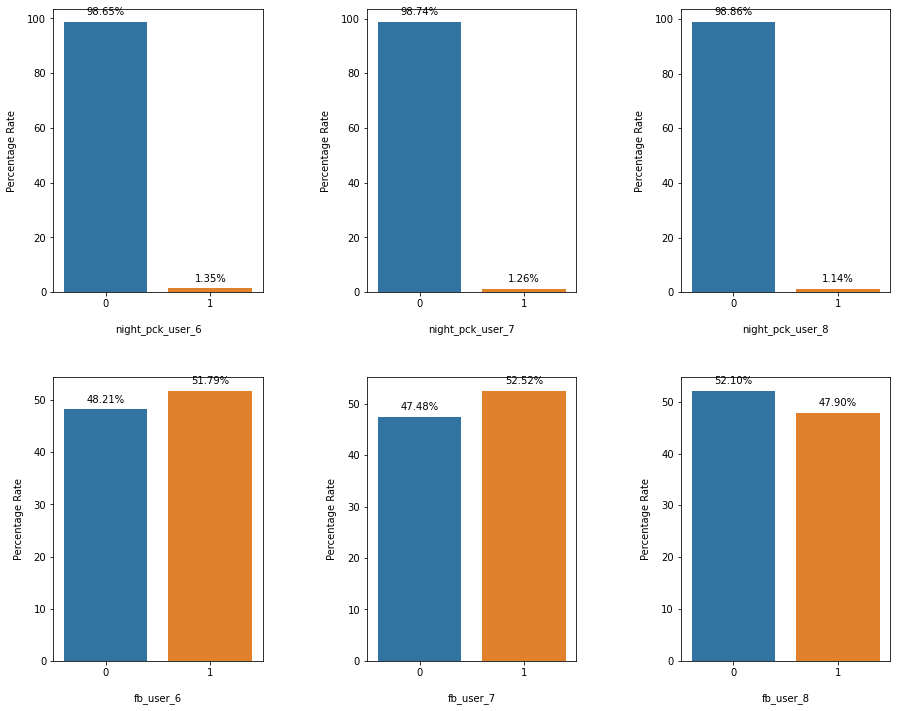

In [61]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((telecom_data[col_list].value_counts(dropna = False))/(len(telecom_data[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    
    add_data_labels(ax)

    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

## <font color = "purple"> Insights: </font>

Insights about above Bar Graphs, We can see that nobody is using Night pack feature and you can see these in all three months.
but on the other hand users are using Facebook(FB) in equal amount. 

Positive examples = 2364
Negative examples = 27460
Rate of Churn = 8.61%


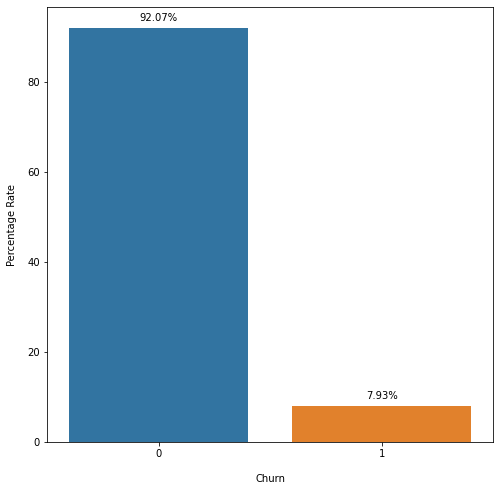

In [62]:
pos = telecom_data[telecom_data["churn"] == 1].shape[0]
neg = telecom_data[telecom_data["churn"] == 0].shape[0]

print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Rate of Churn = {(pos / neg) * 100:.2f}%")

plt.figure(figsize = (8, 8))

series = round(((telecom_data["churn"].value_counts(dropna = False))/(len(telecom_data["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)


add_data_labels(ax)

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

In [63]:
def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

In [64]:
def plot_univariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    
    plt.subplot(subplot_x, subplot_y, 1)

    sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
    
    set_plotting_variable(title_1, xlabel, ylabel)

    
    plt.subplot(subplot_x, subplot_y, 2)

    sns.boxplot(x = x_axis, data = data, color = 'm')
    
    set_plotting_variable(title_2, xlabel, ylabel)
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()

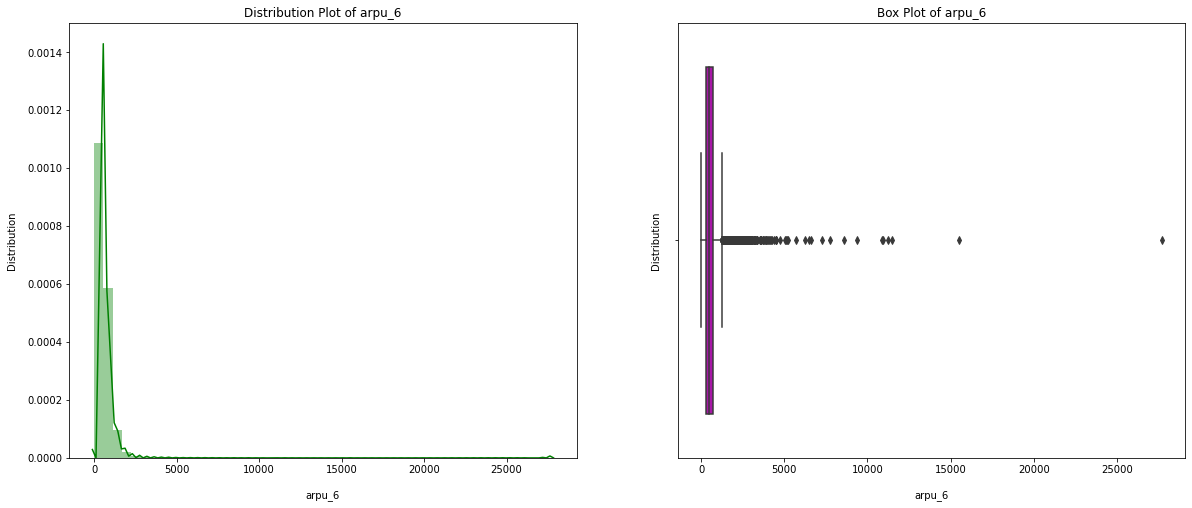

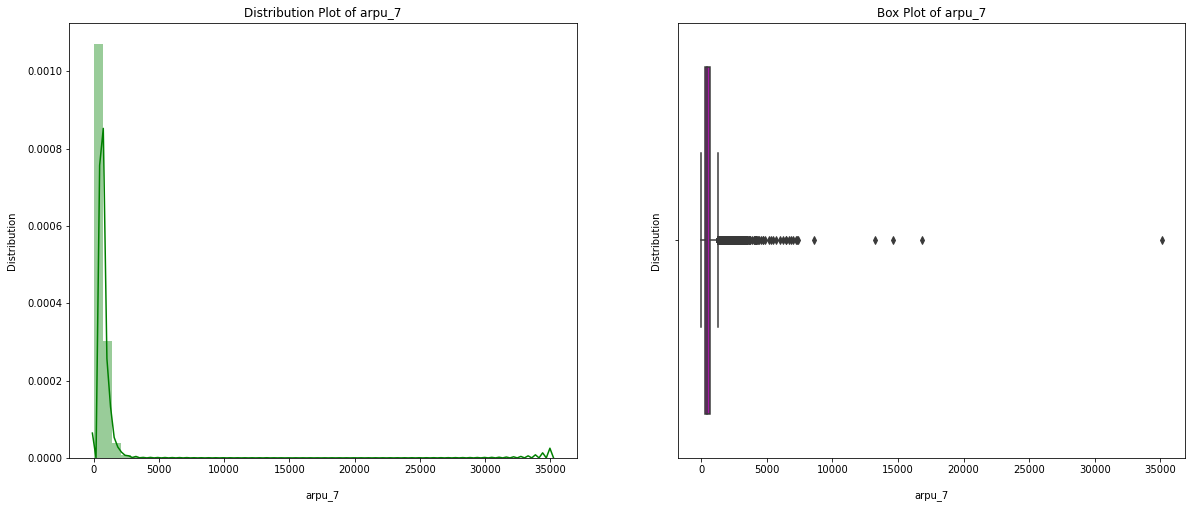

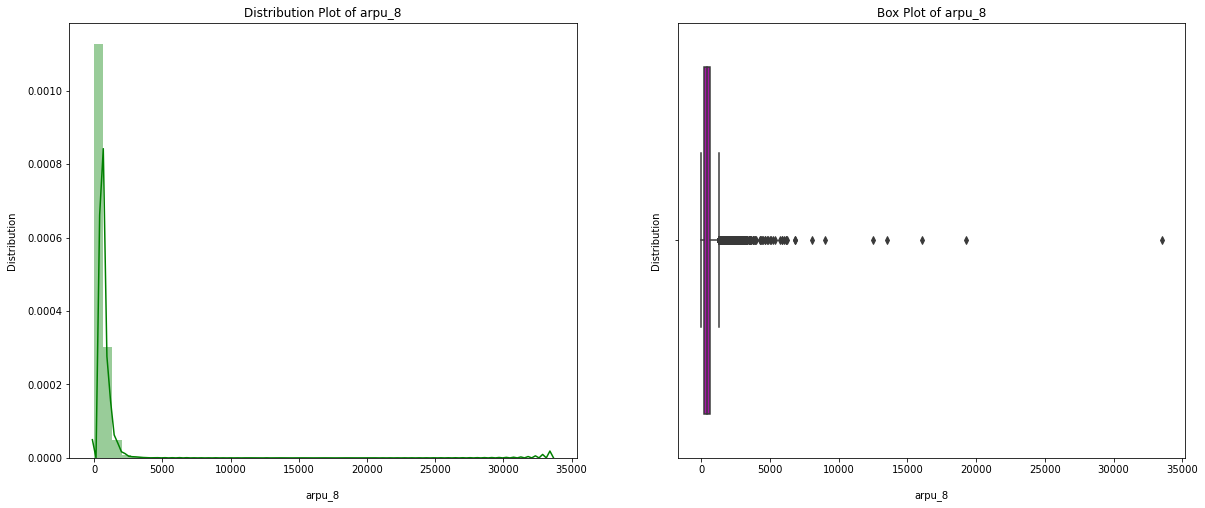

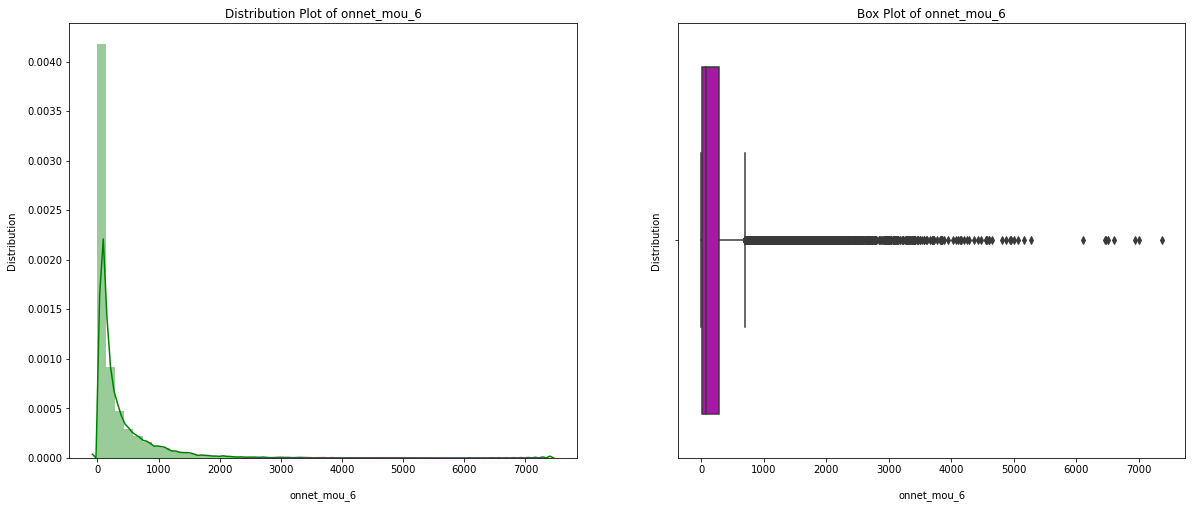

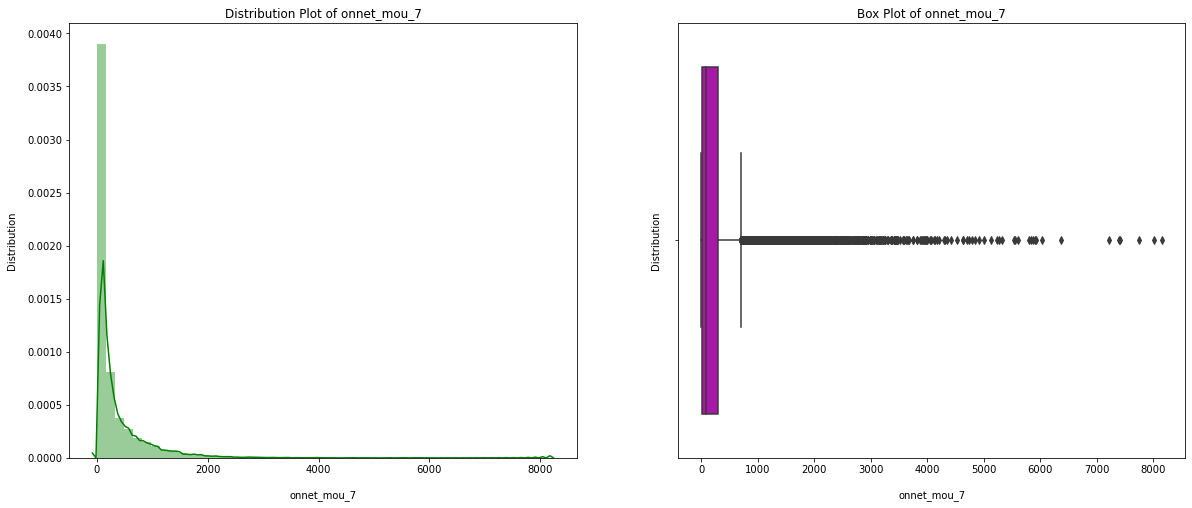

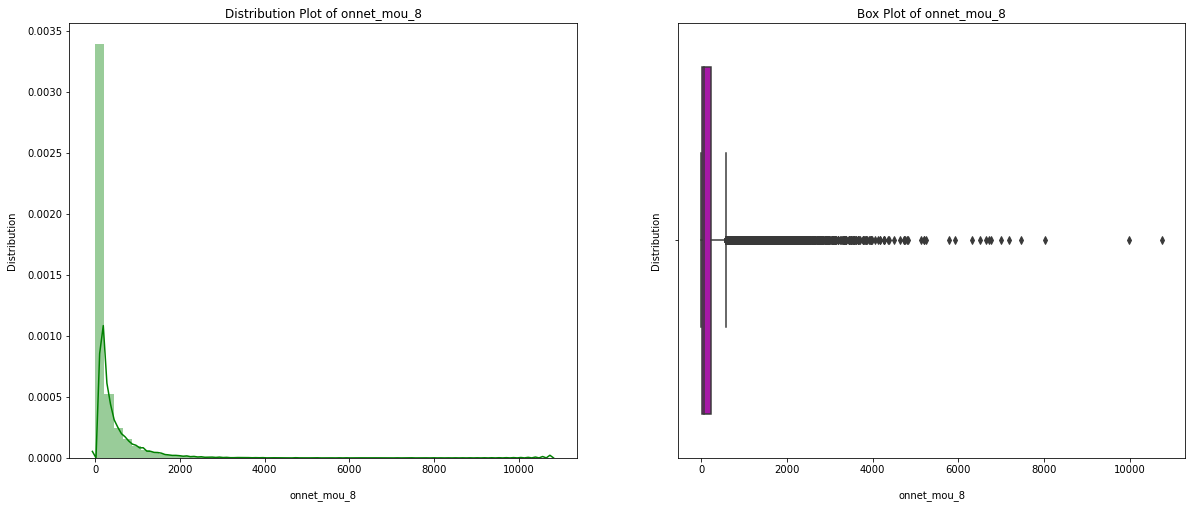

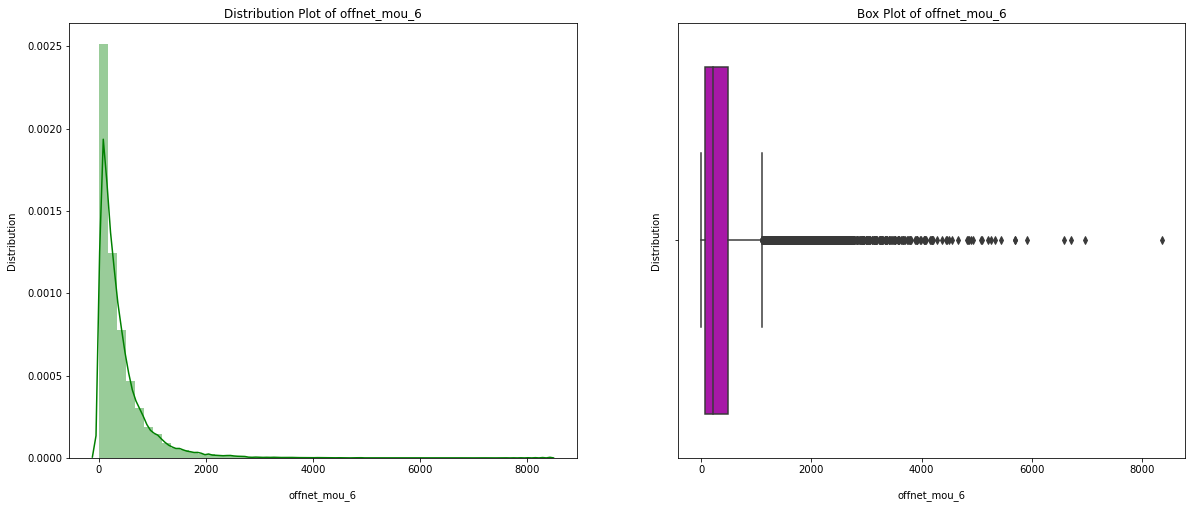

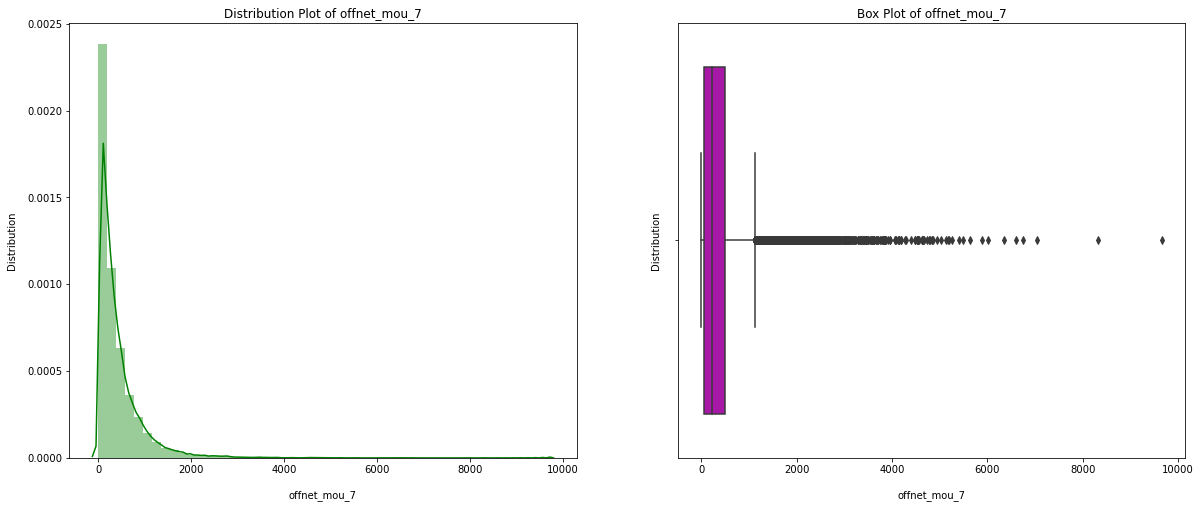

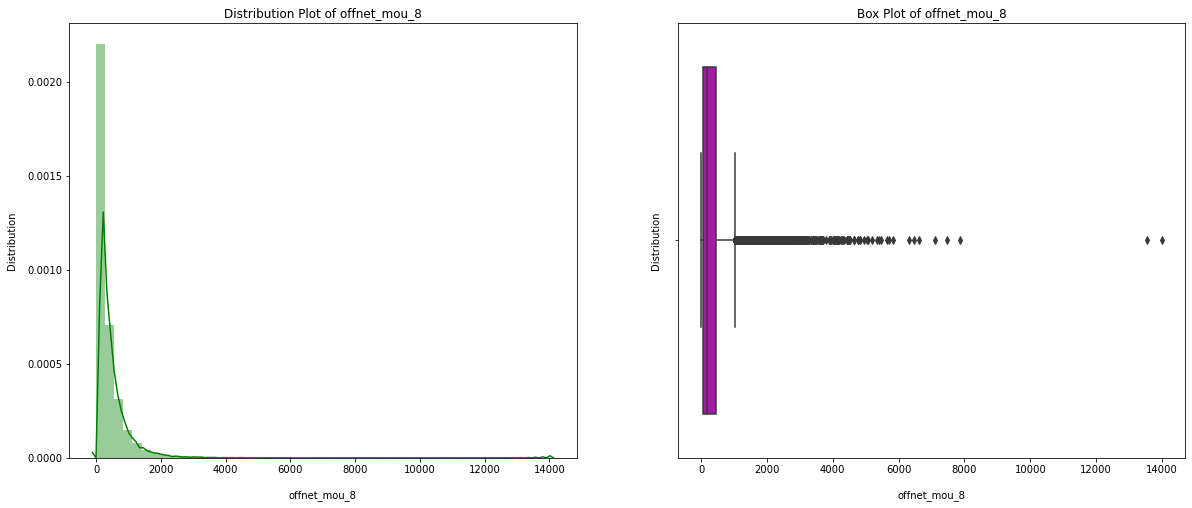

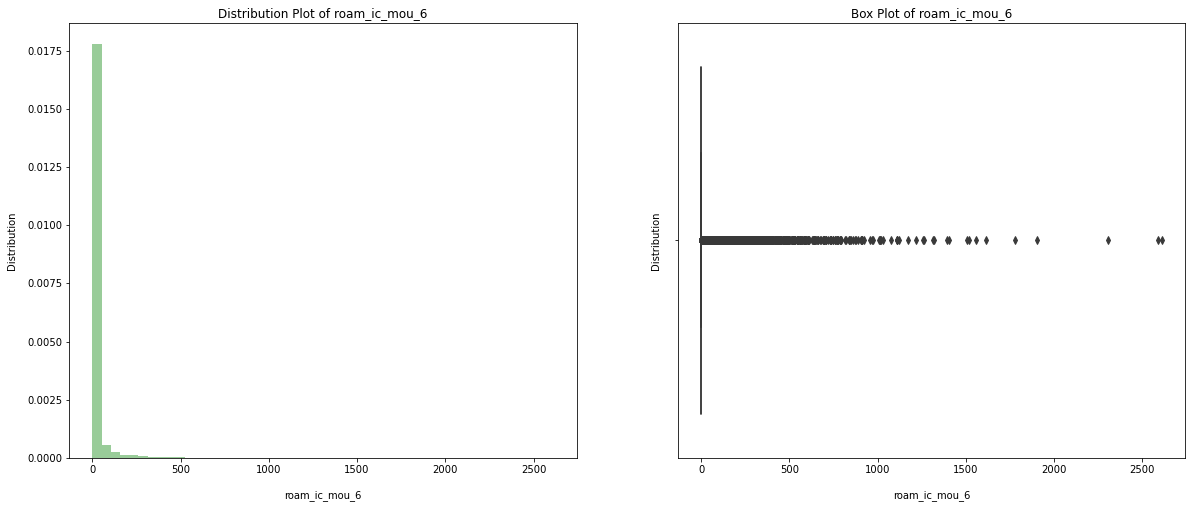

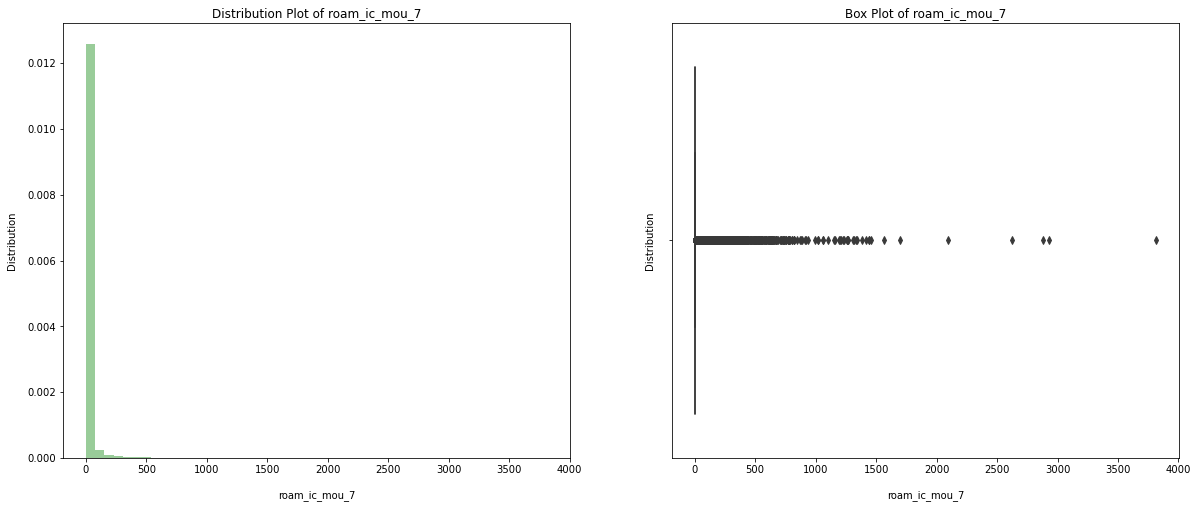

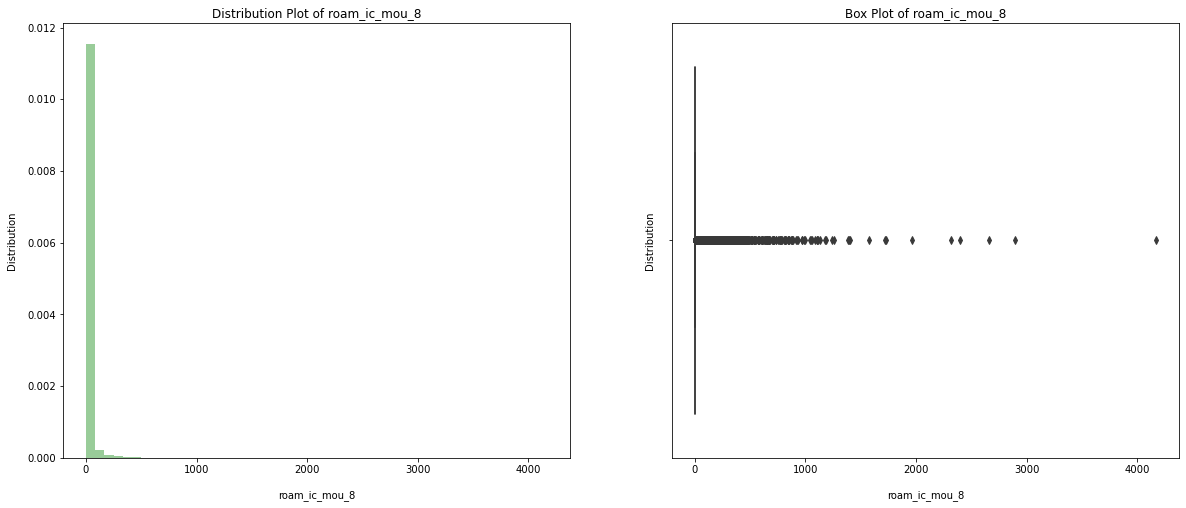

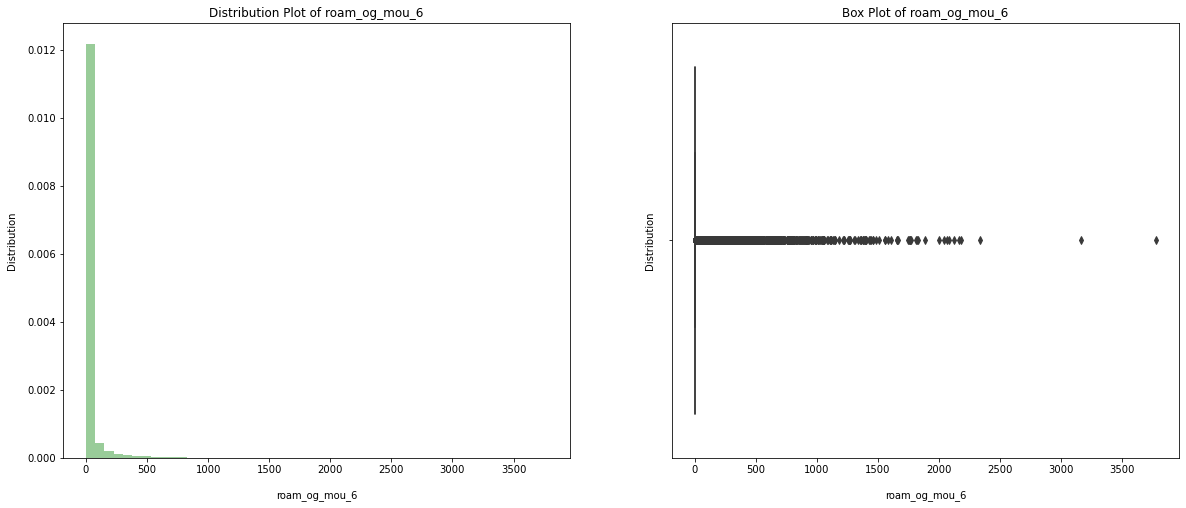

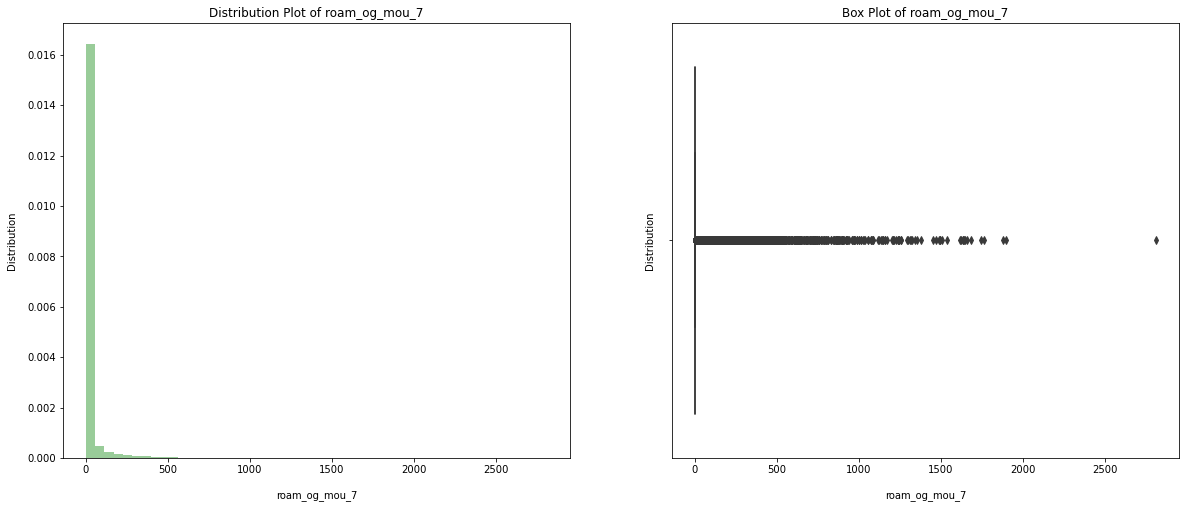

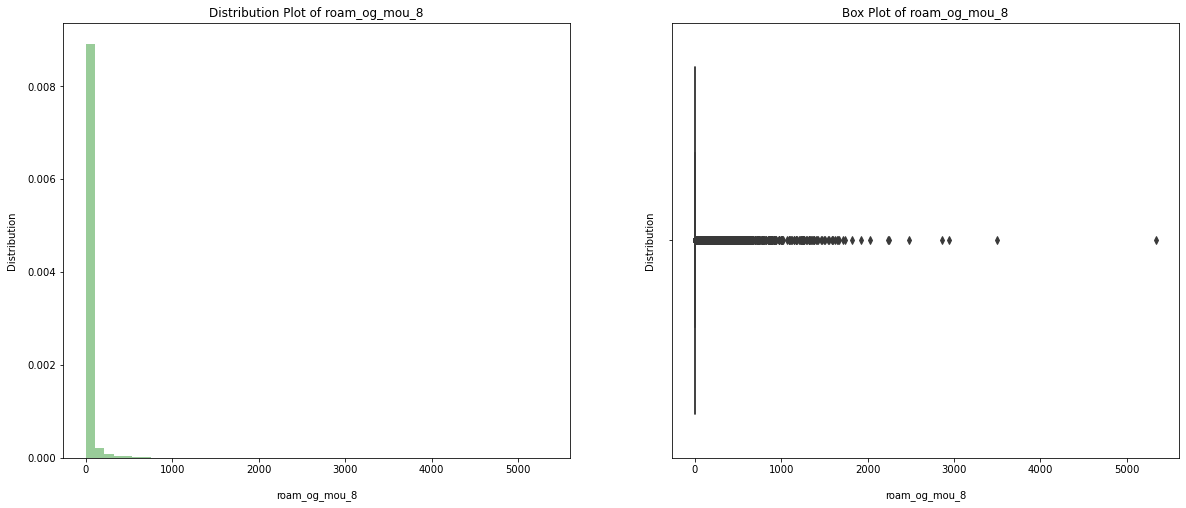

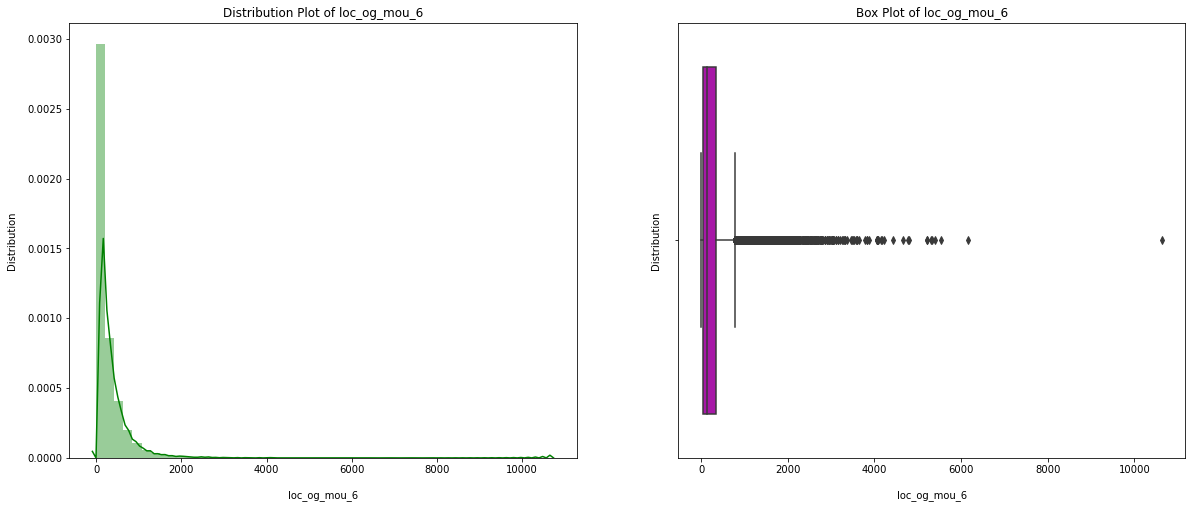

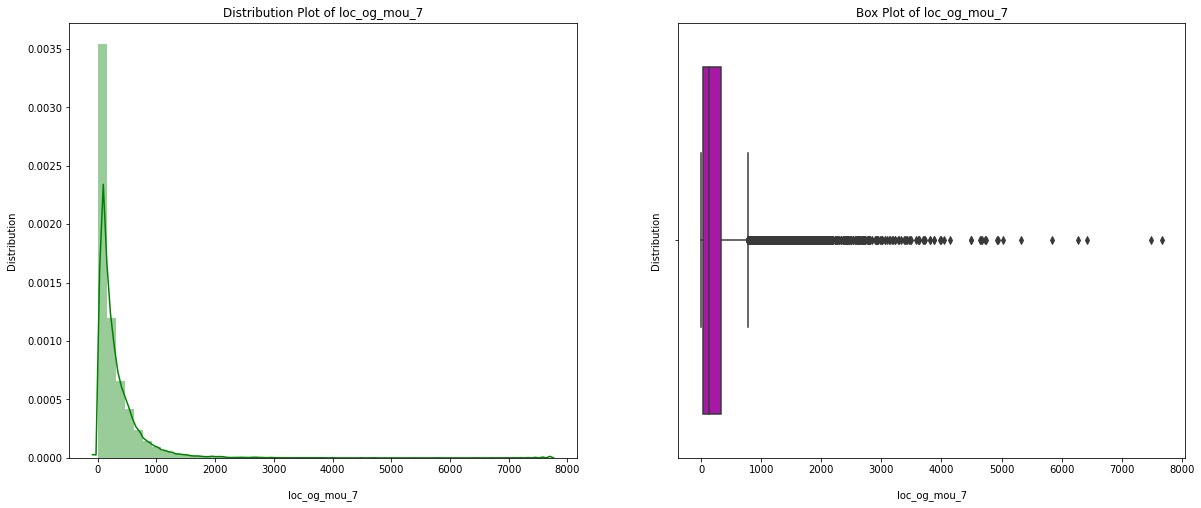

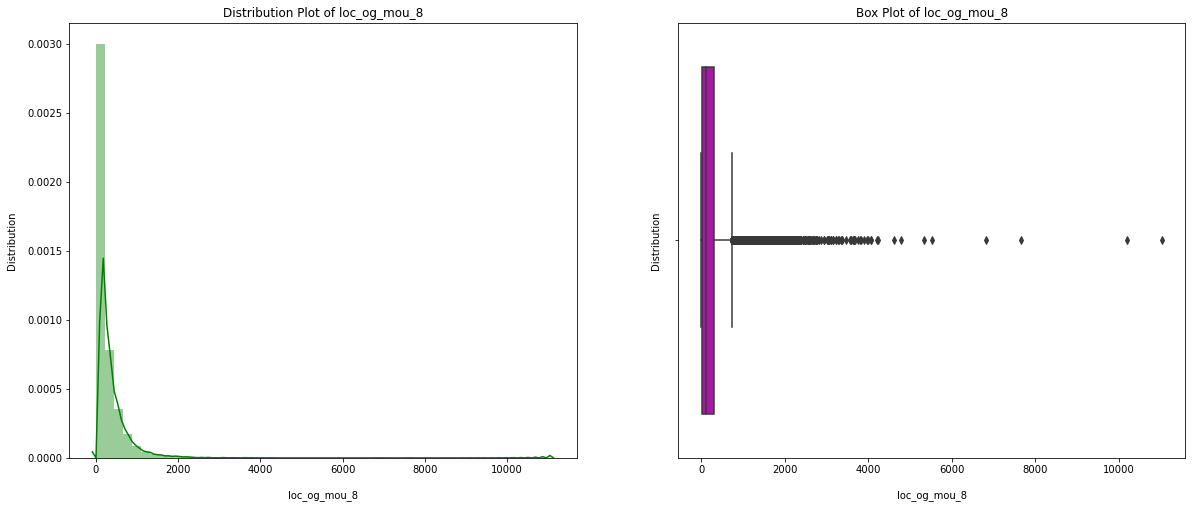

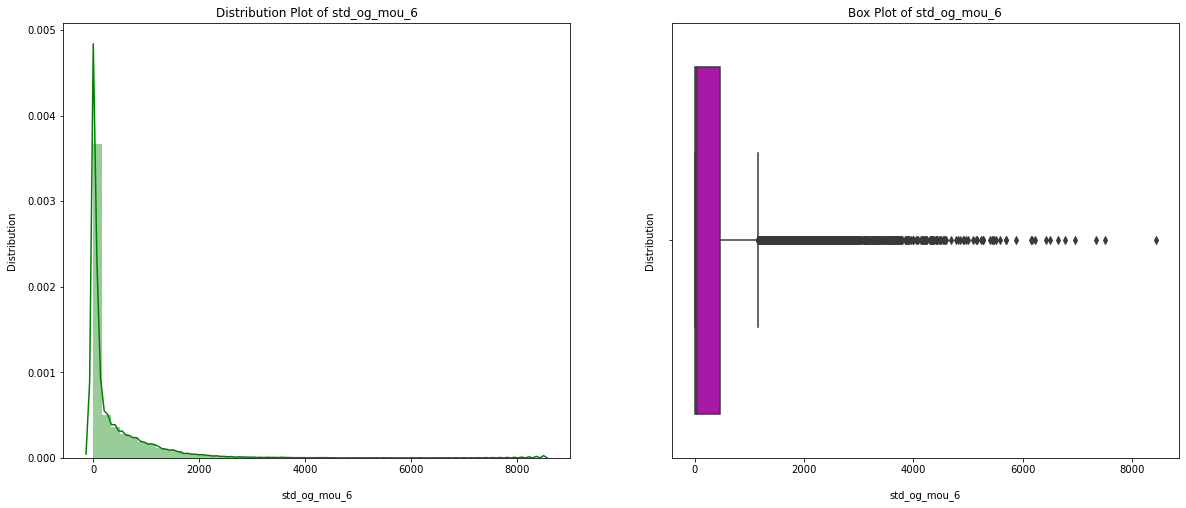

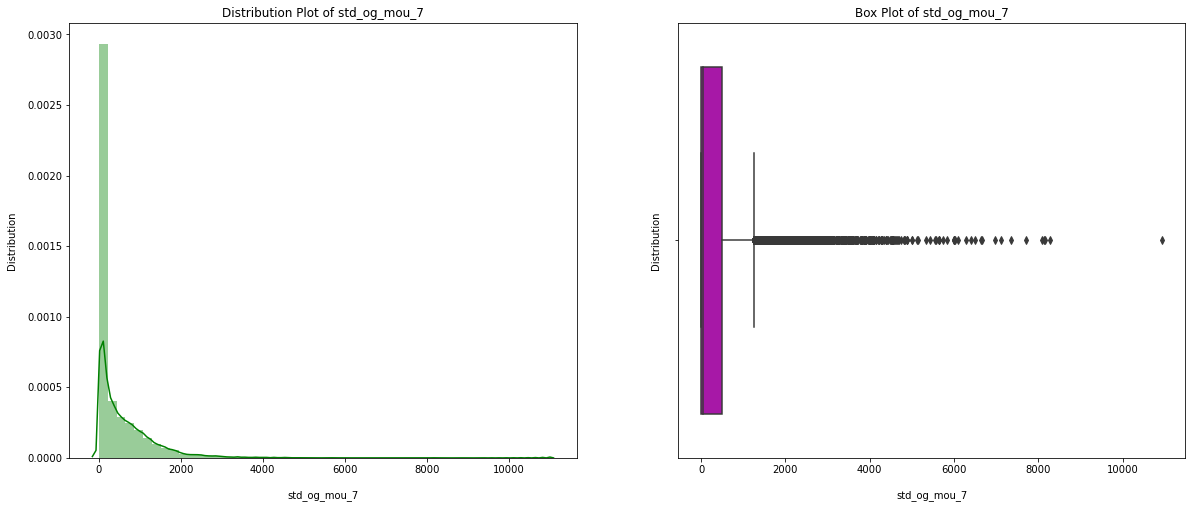

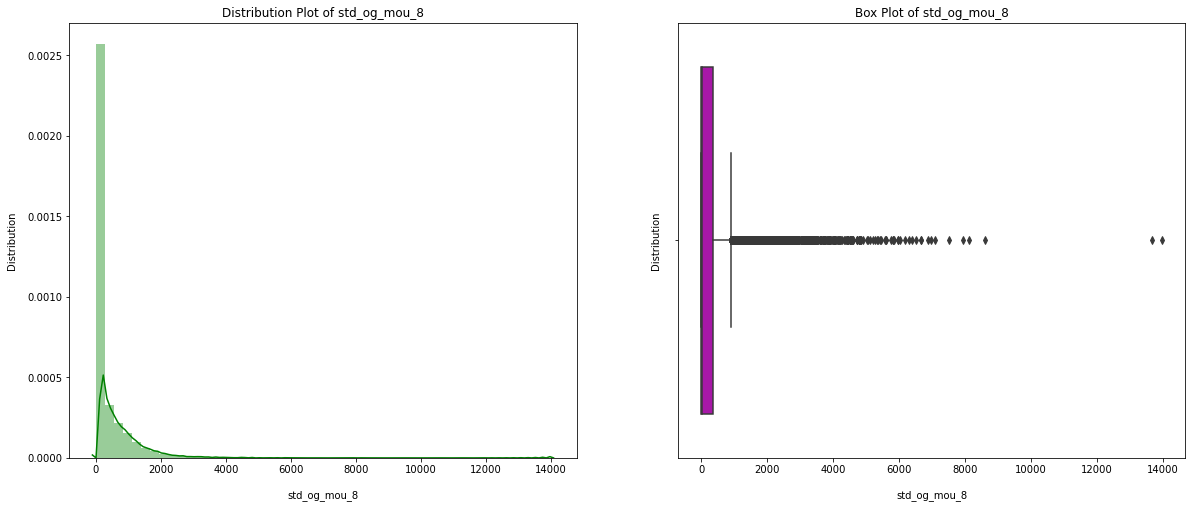

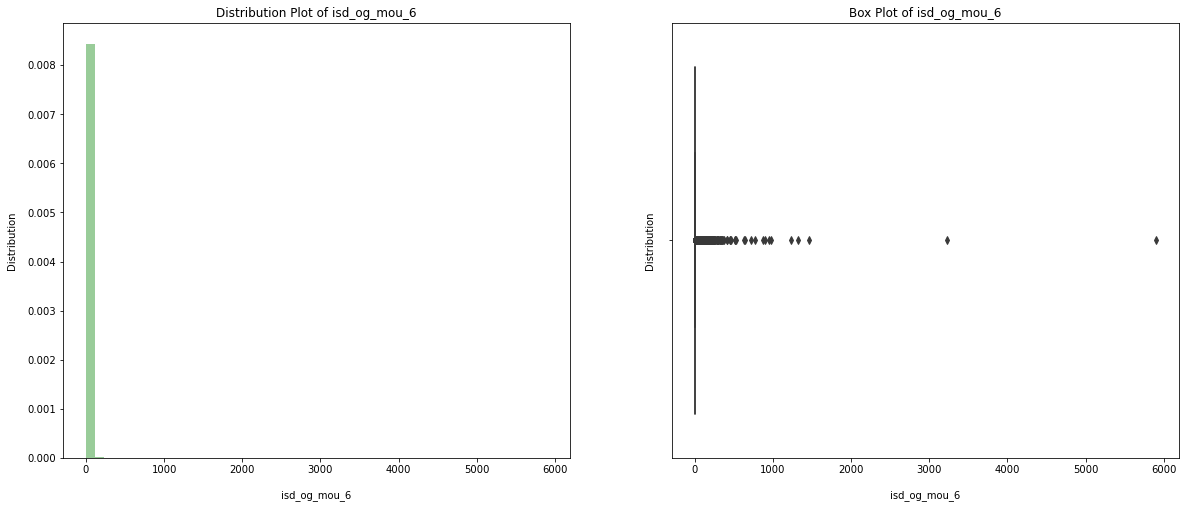

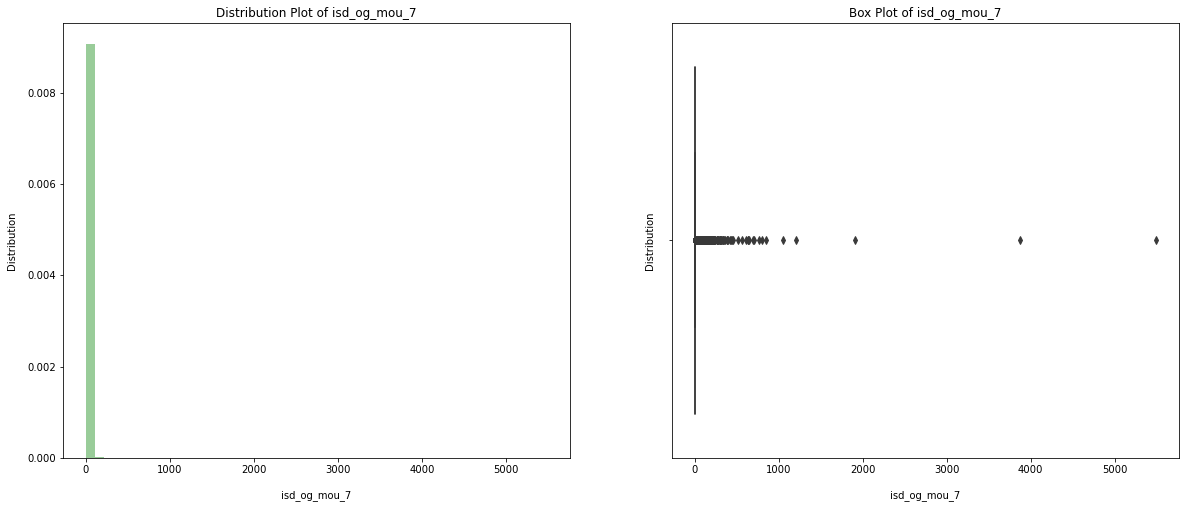

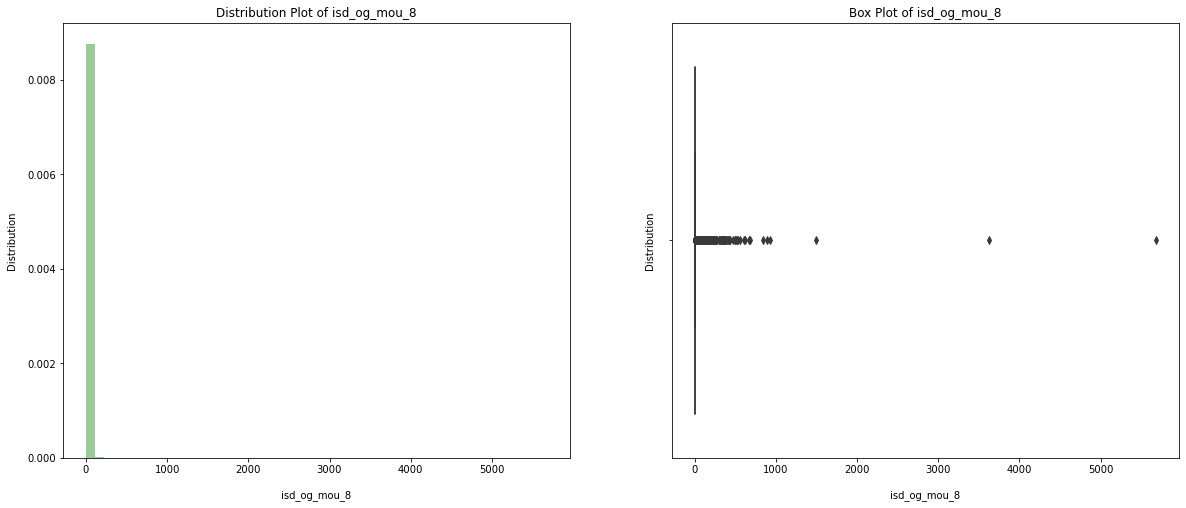

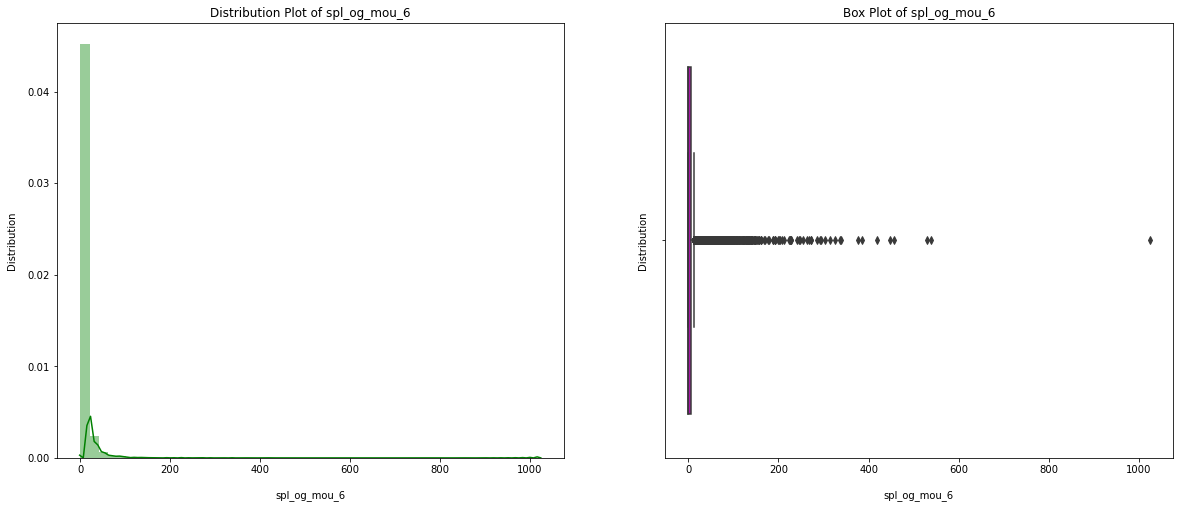

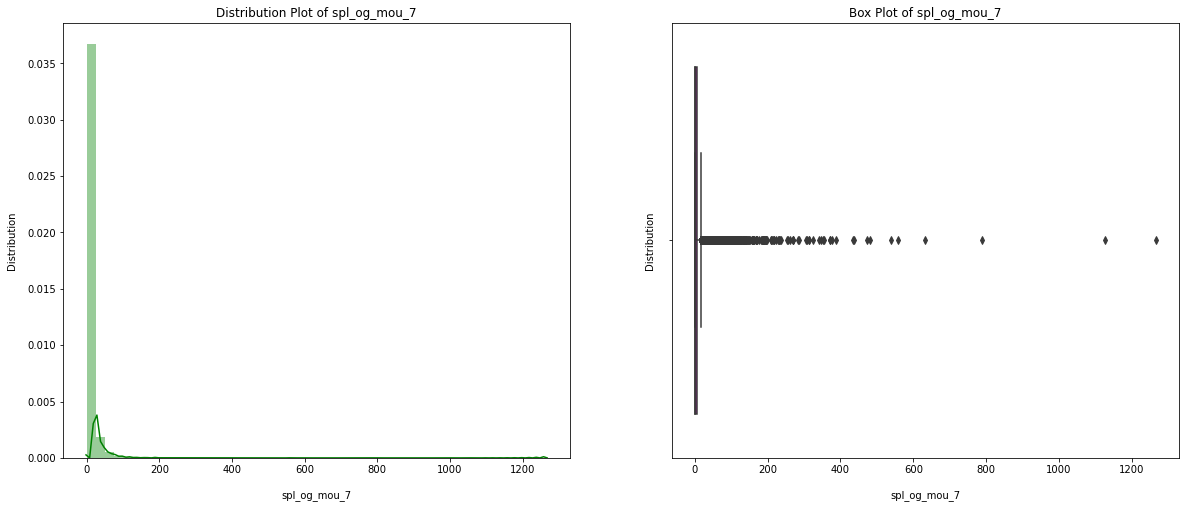

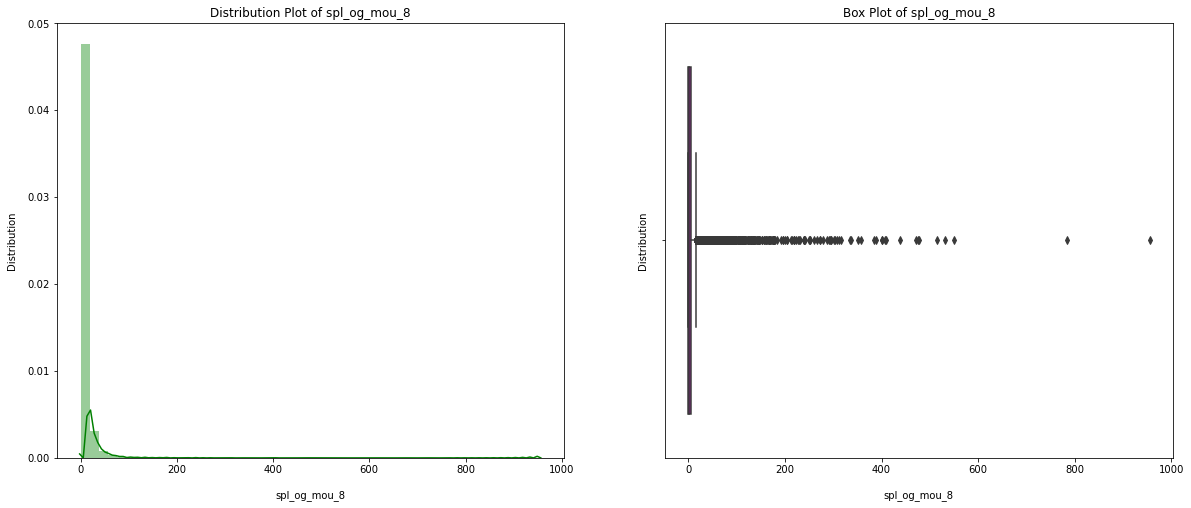

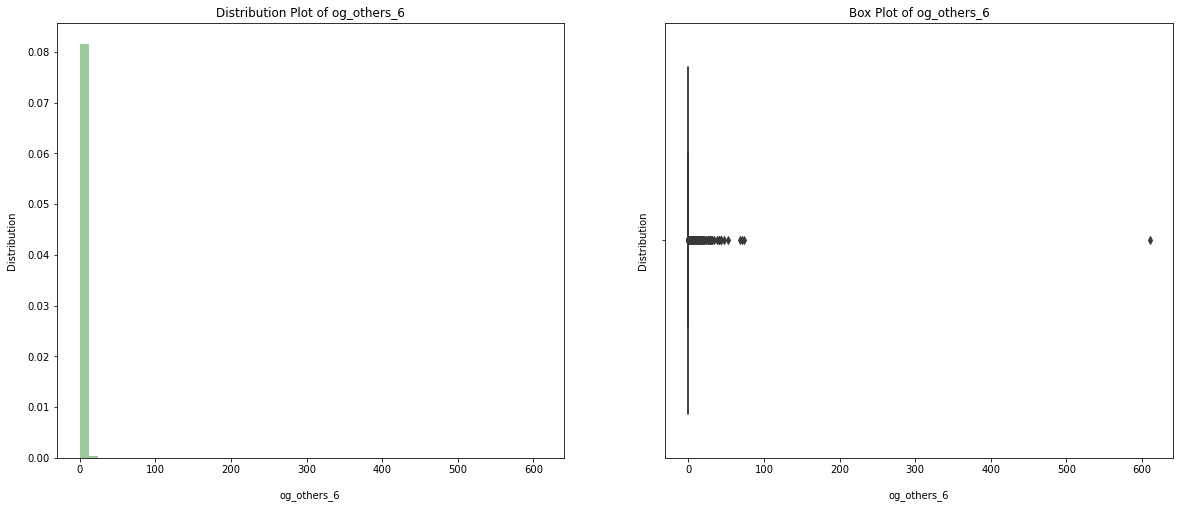

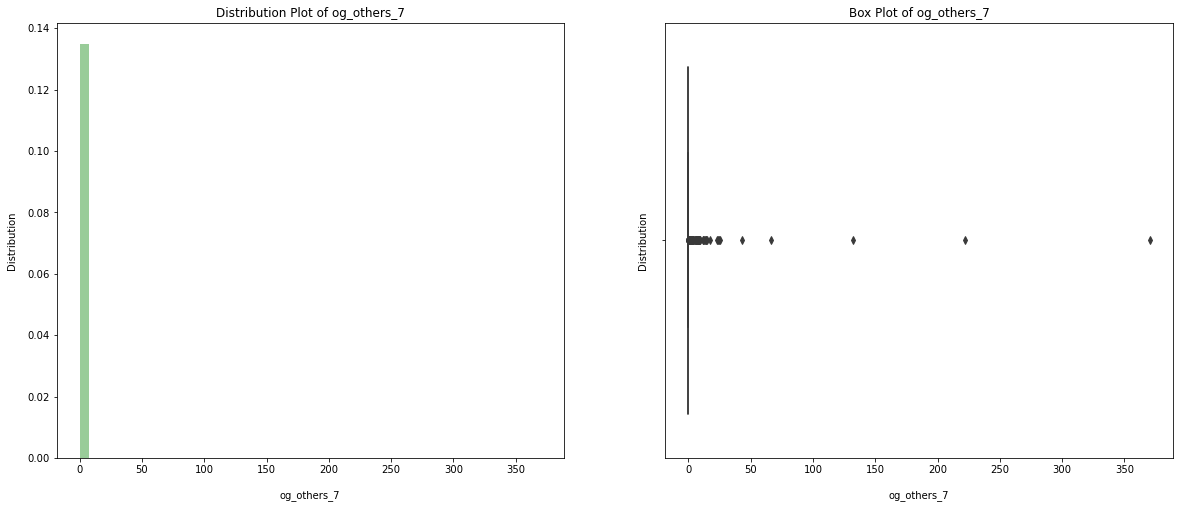

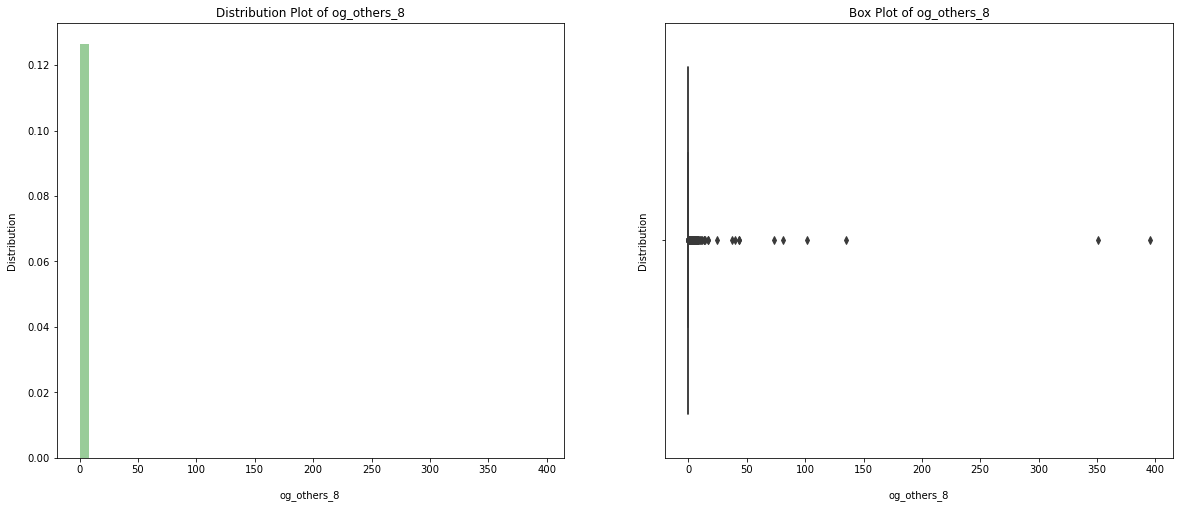

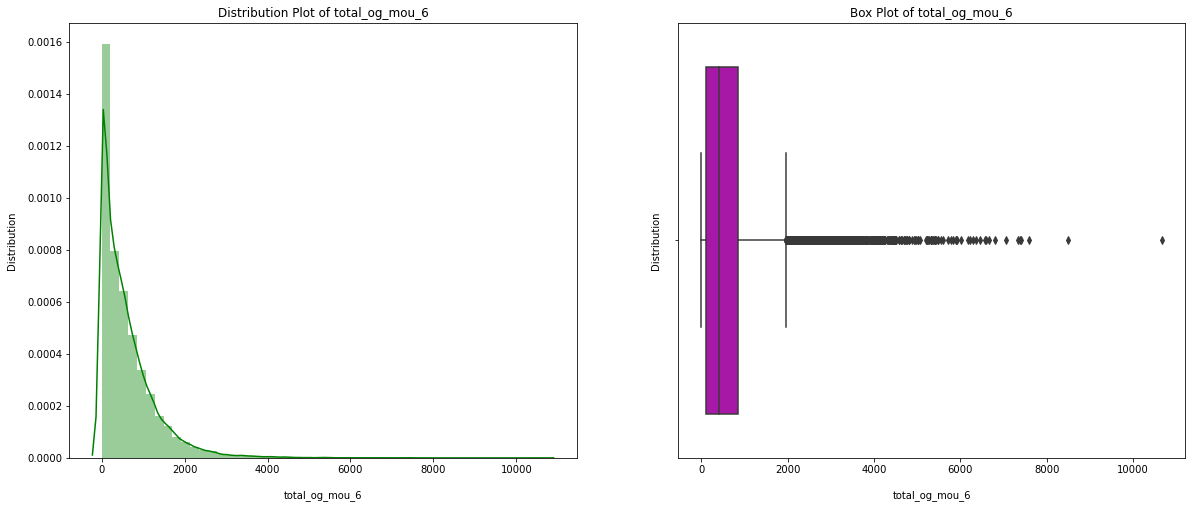

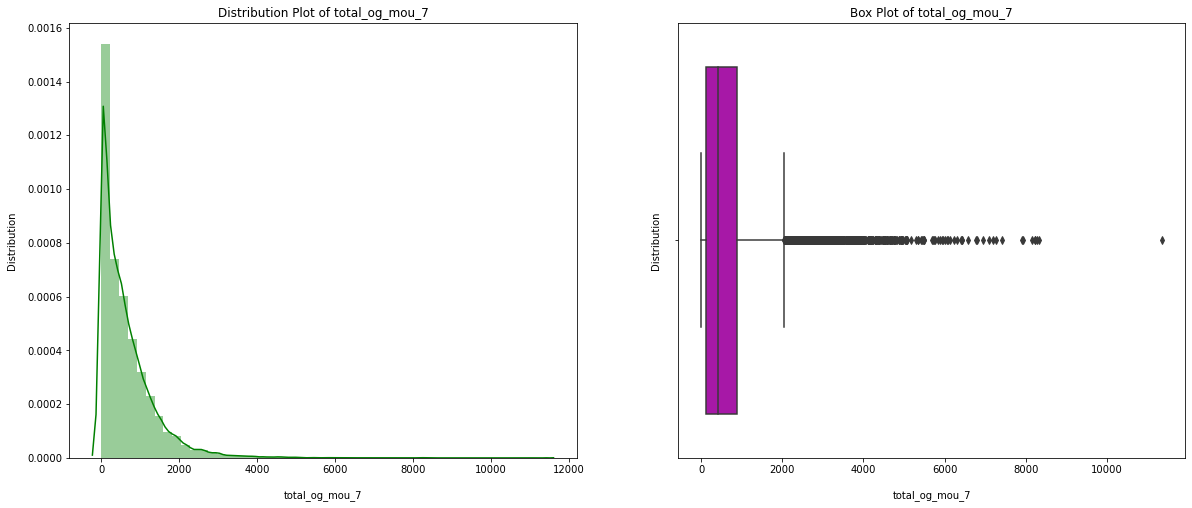

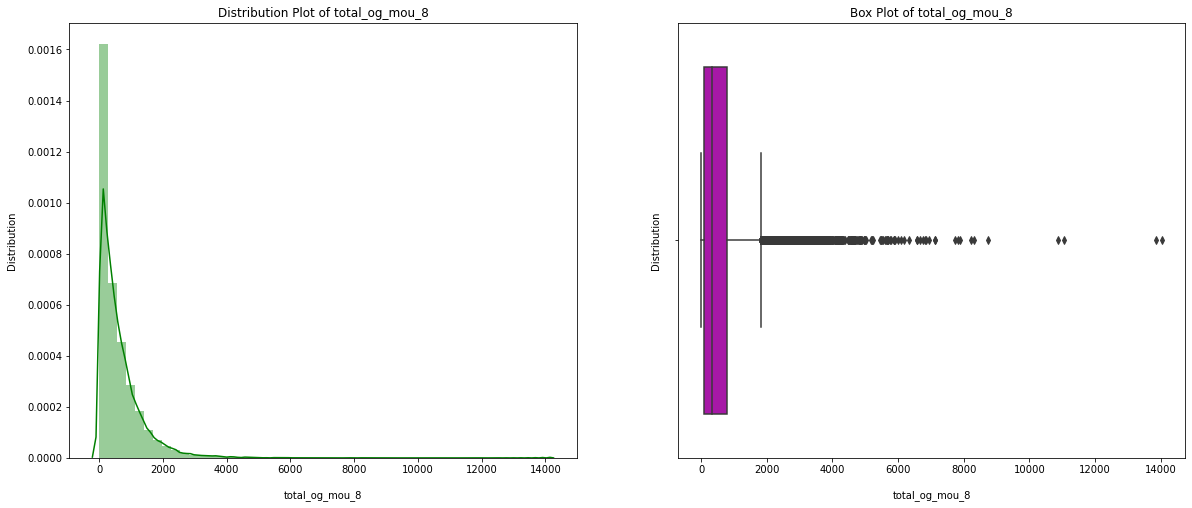

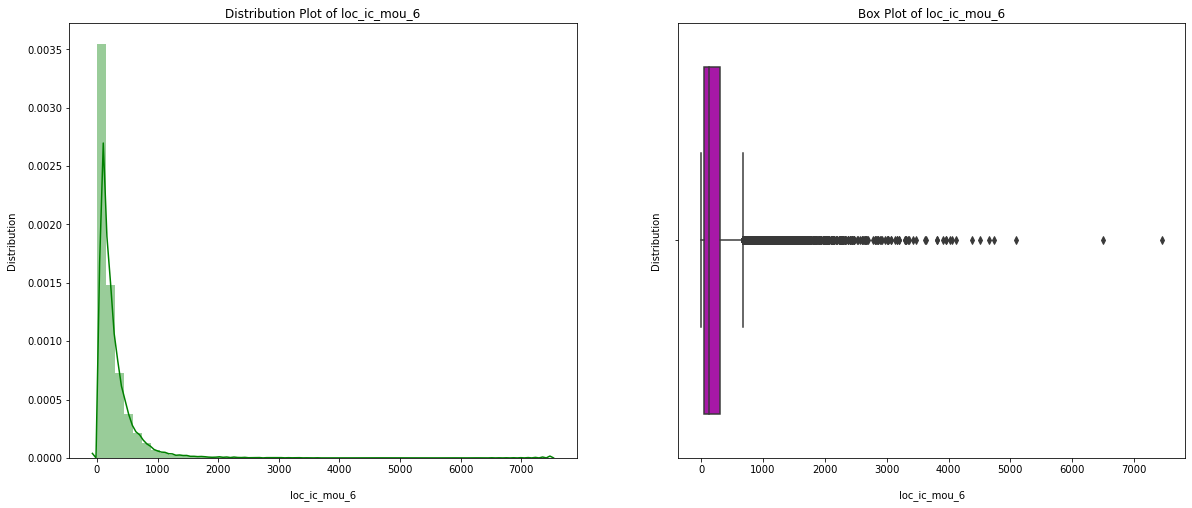

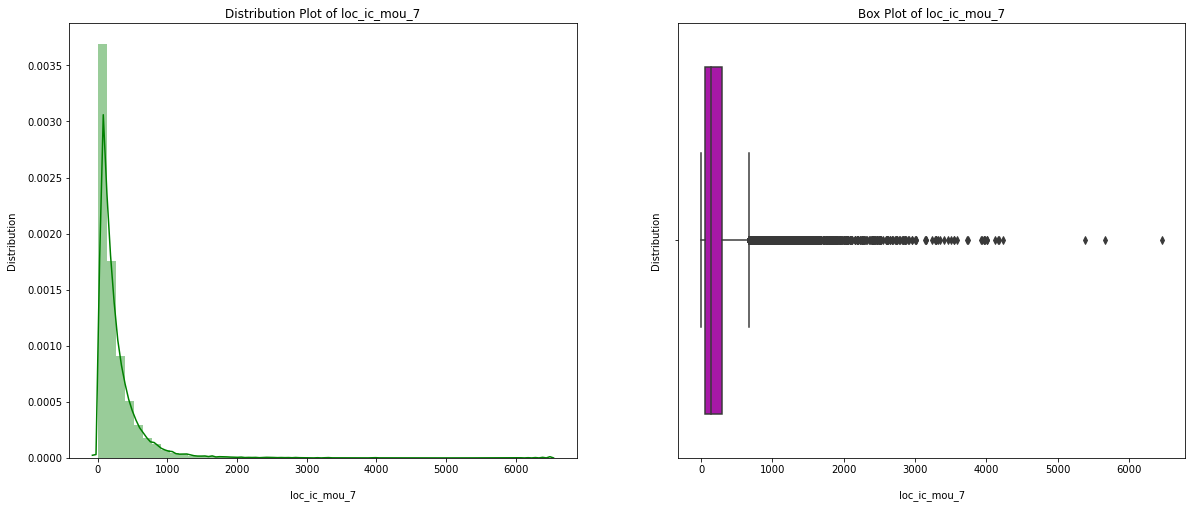

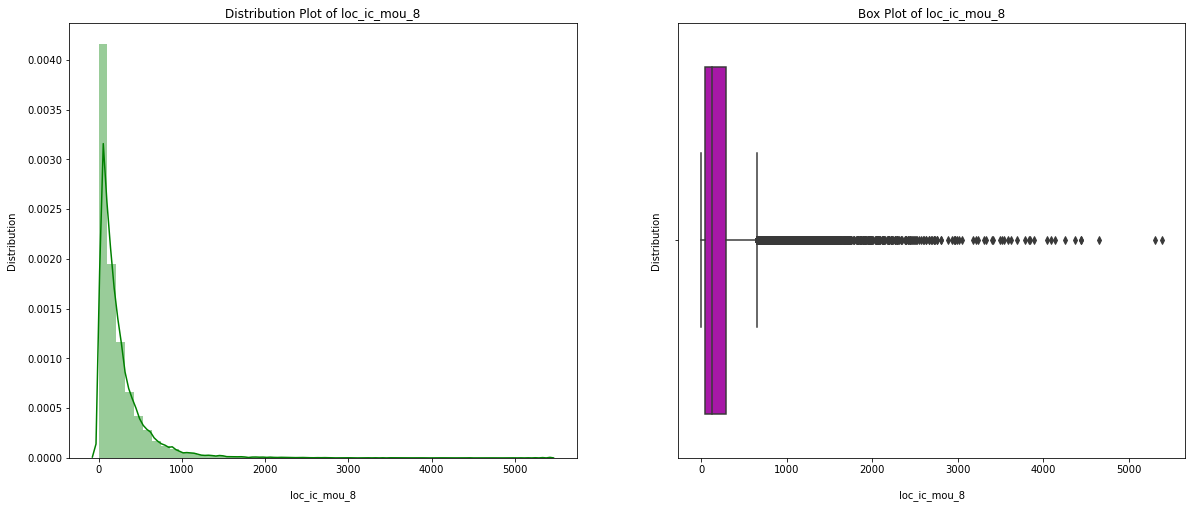

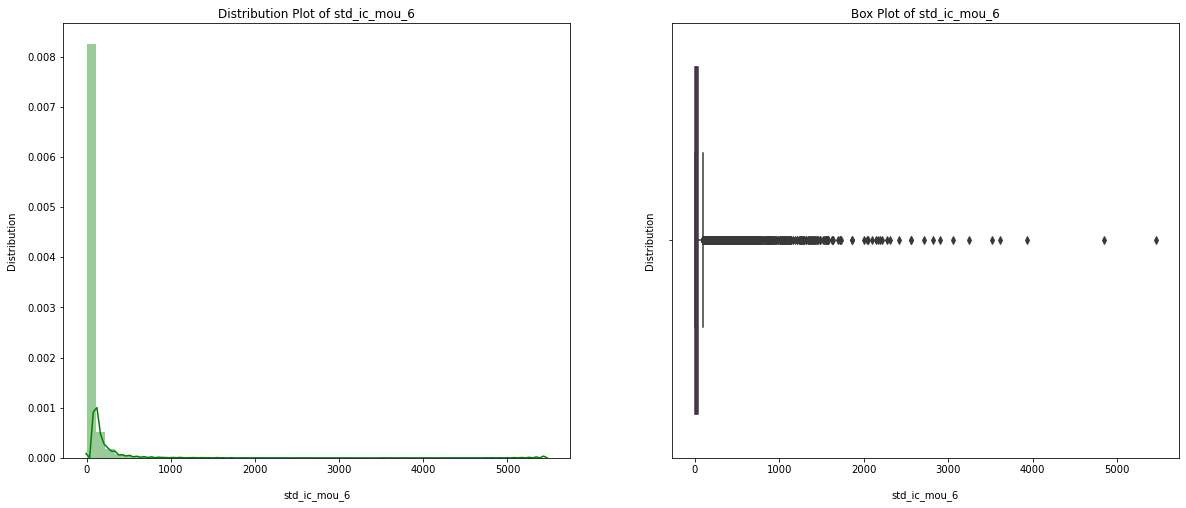

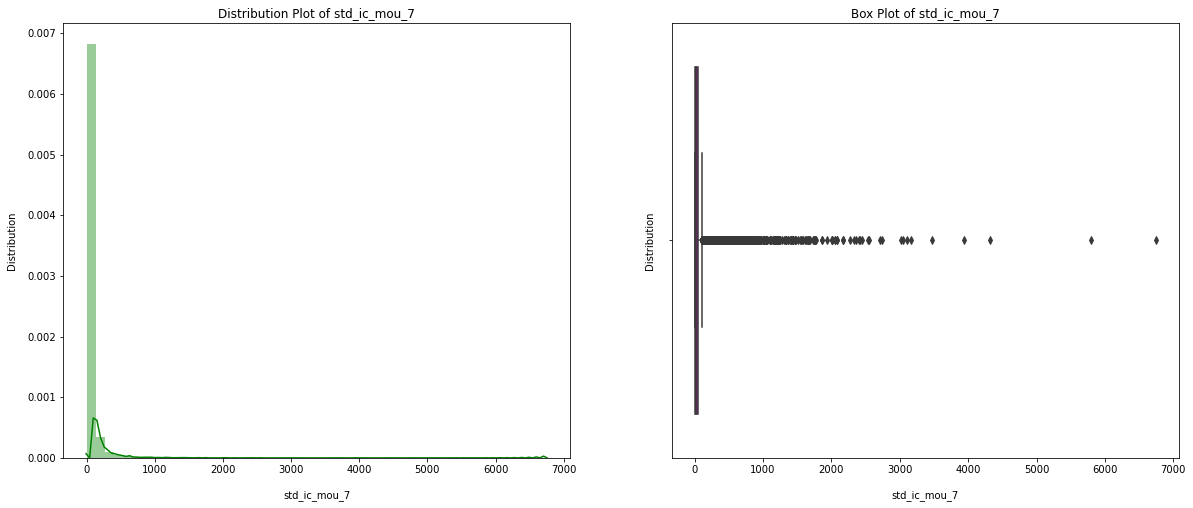

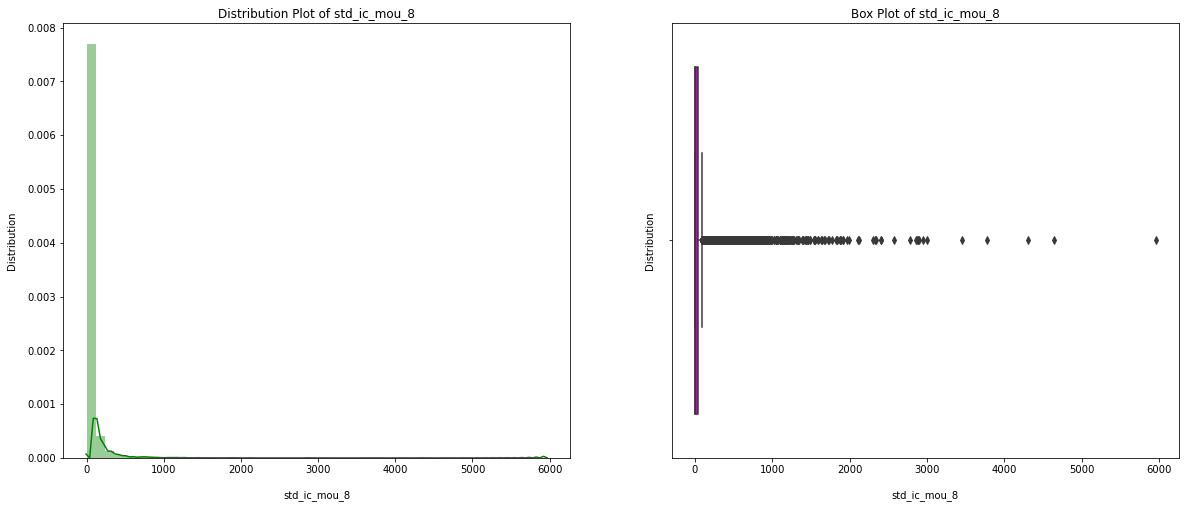

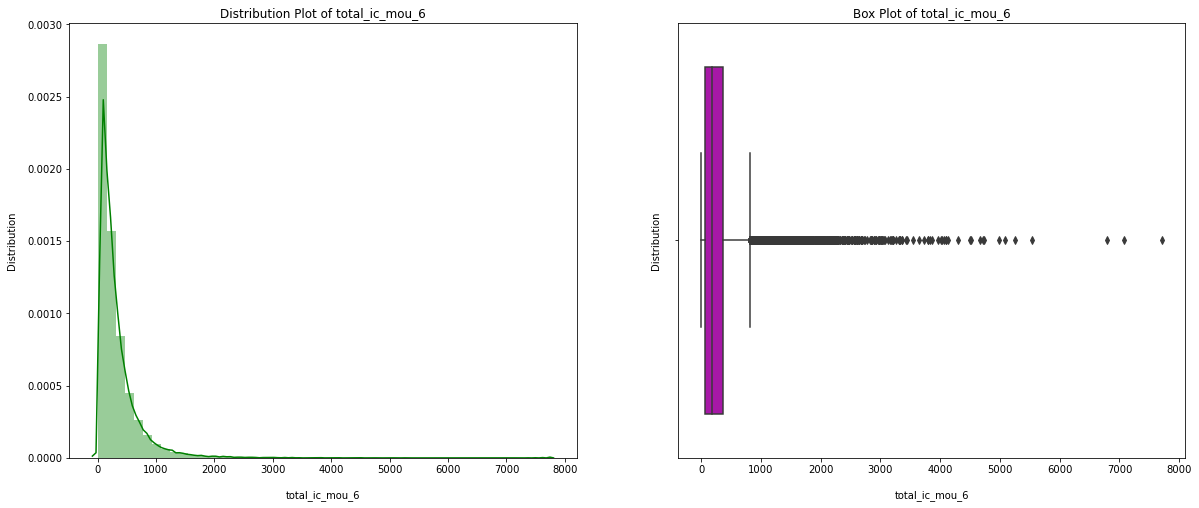

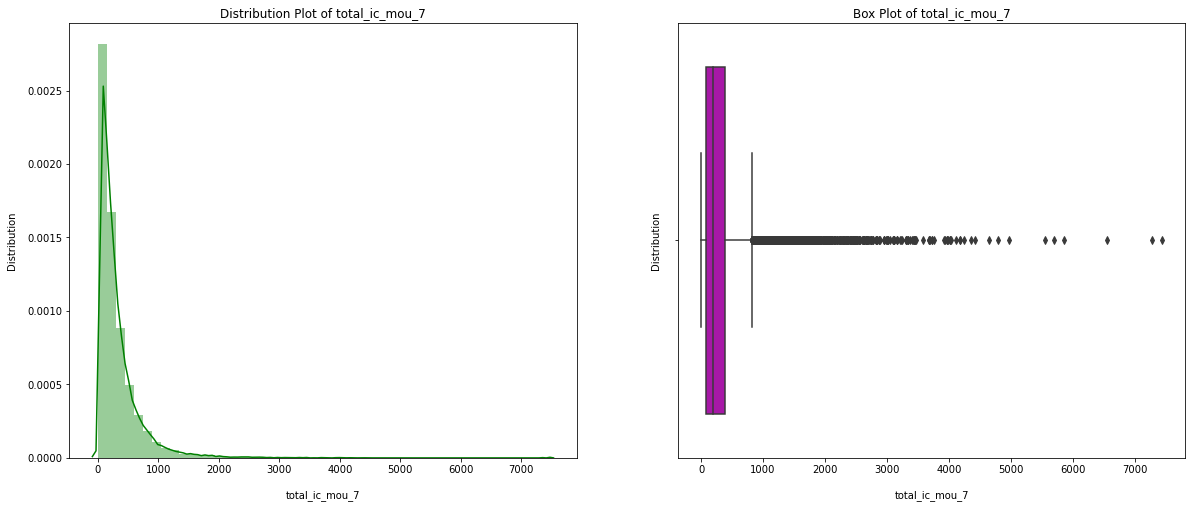

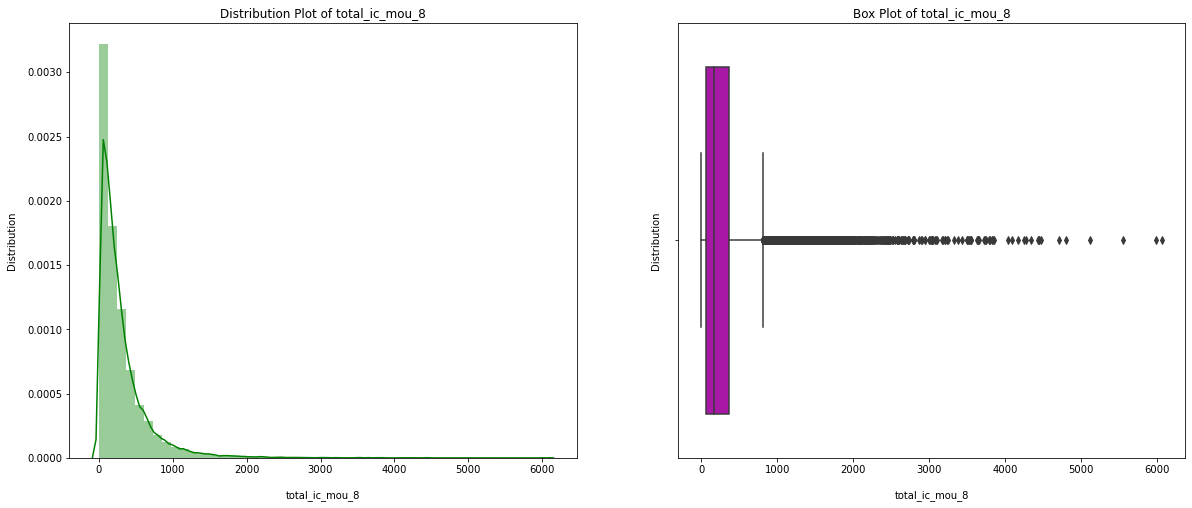

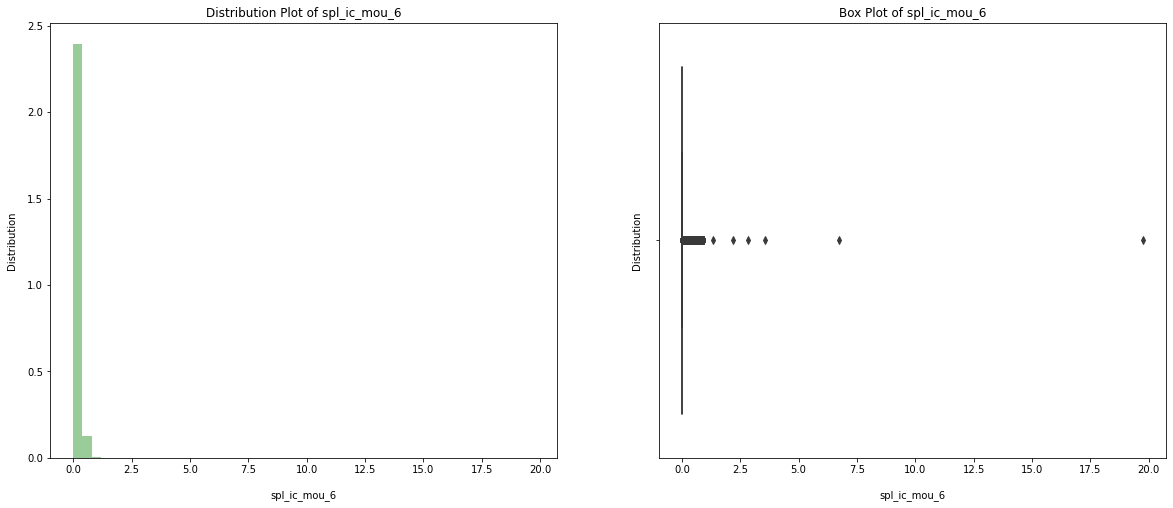

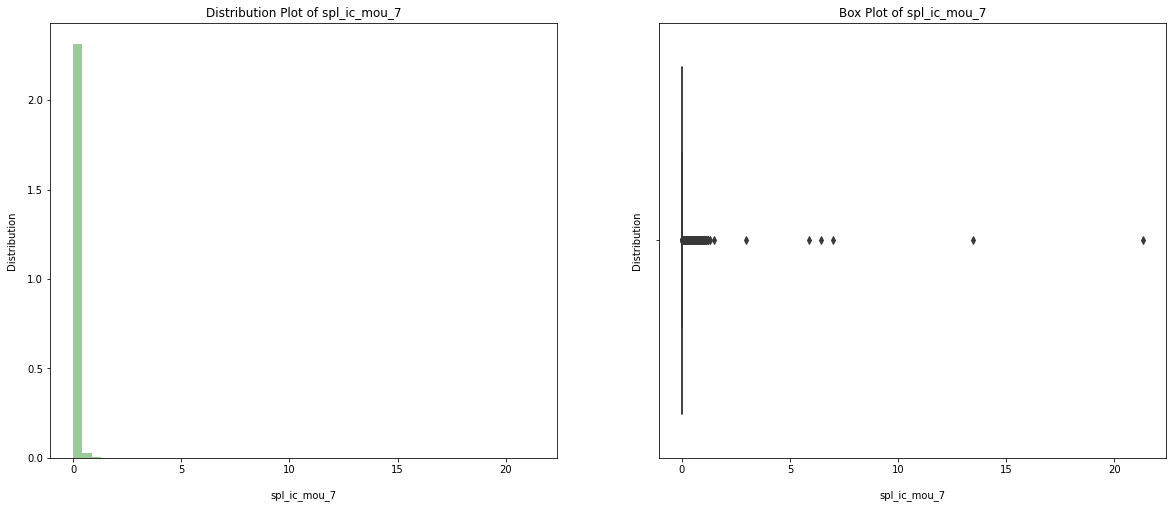

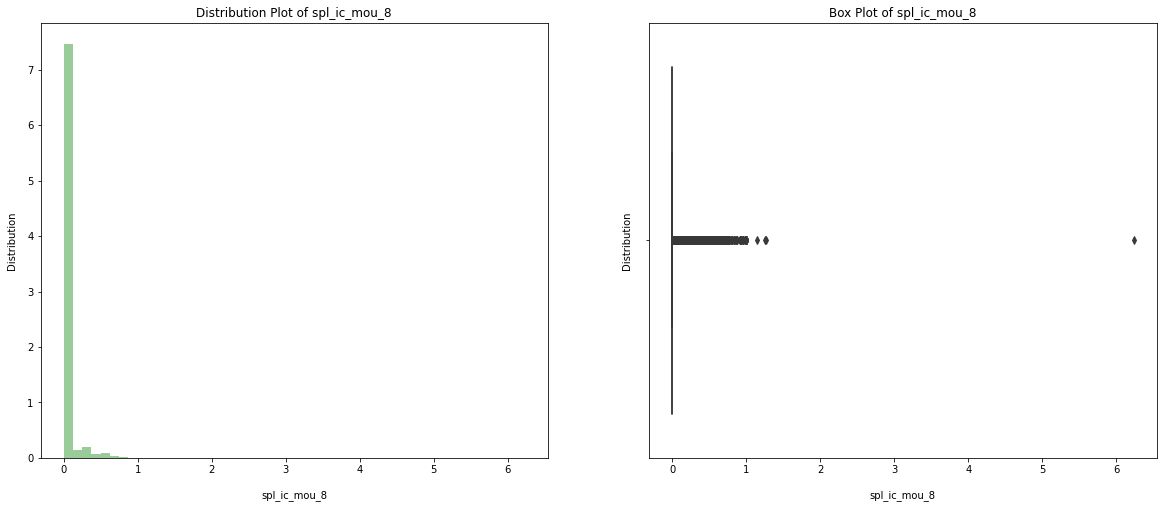

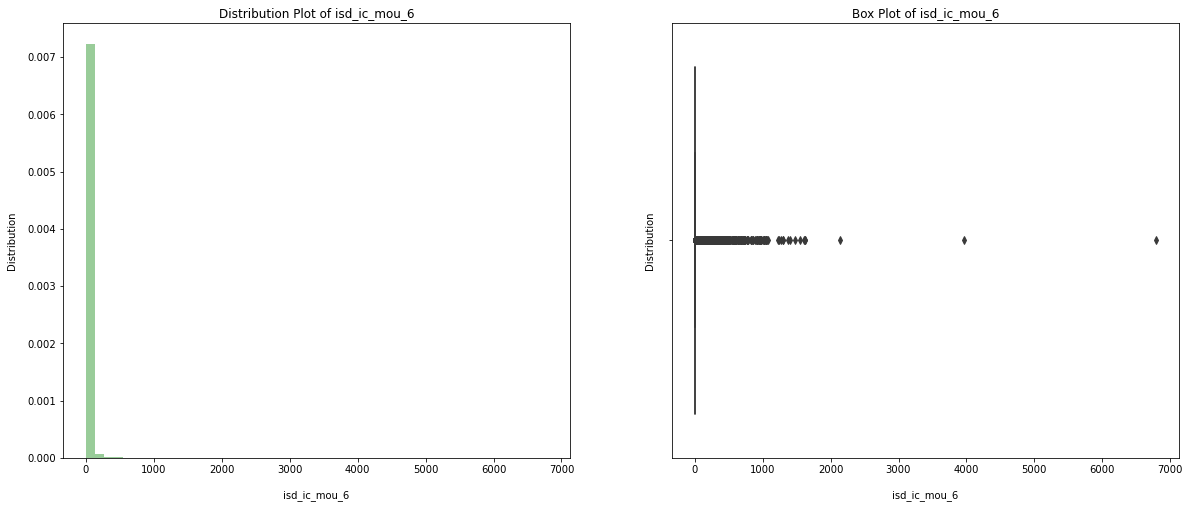

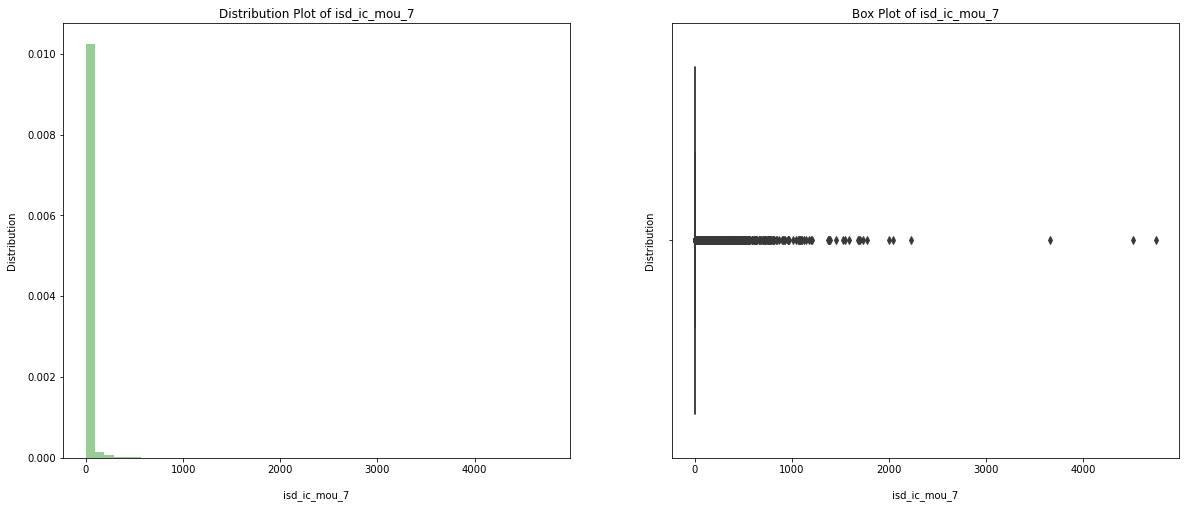

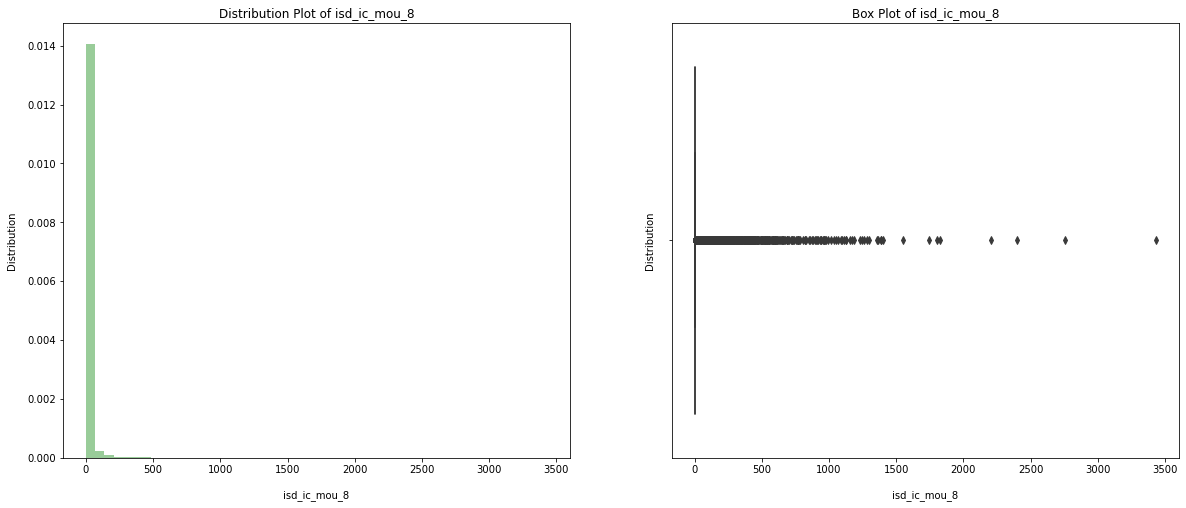

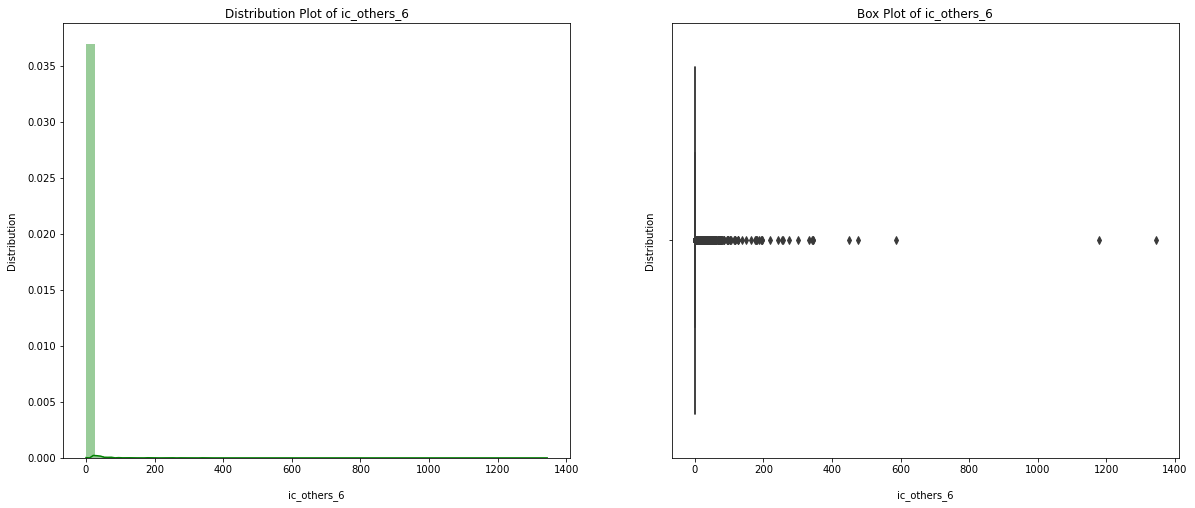

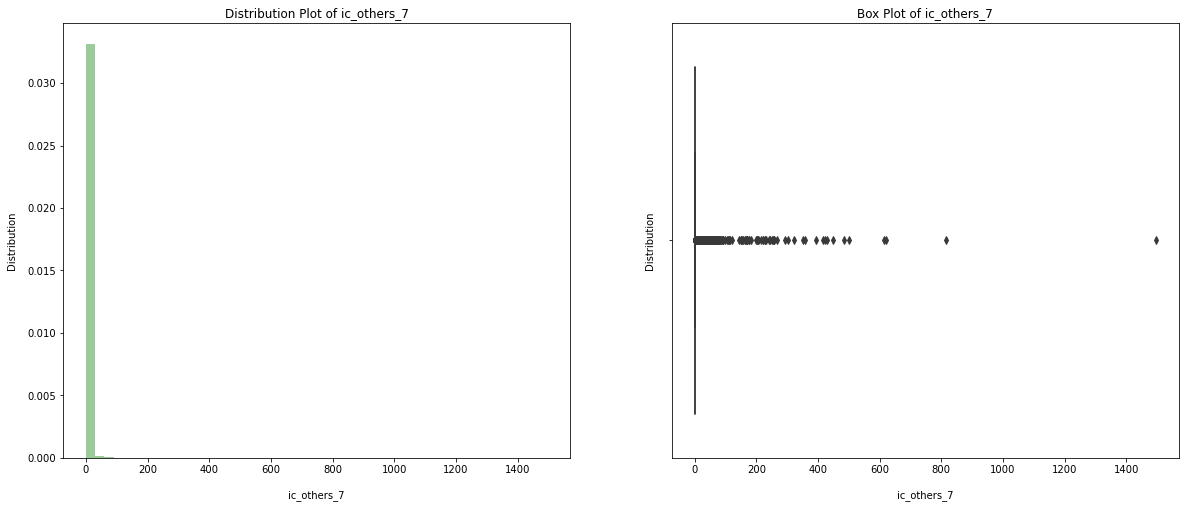

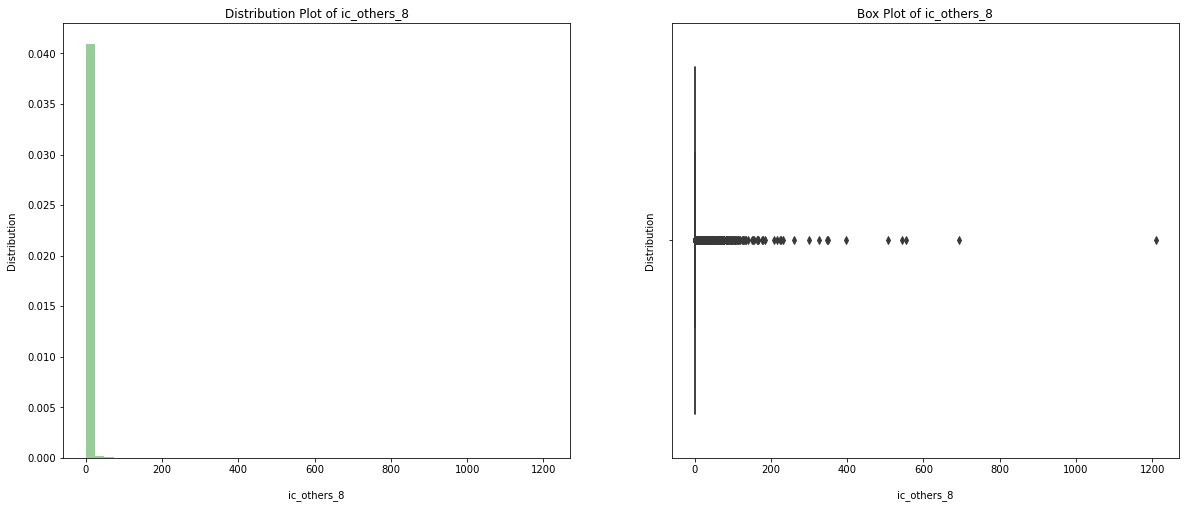

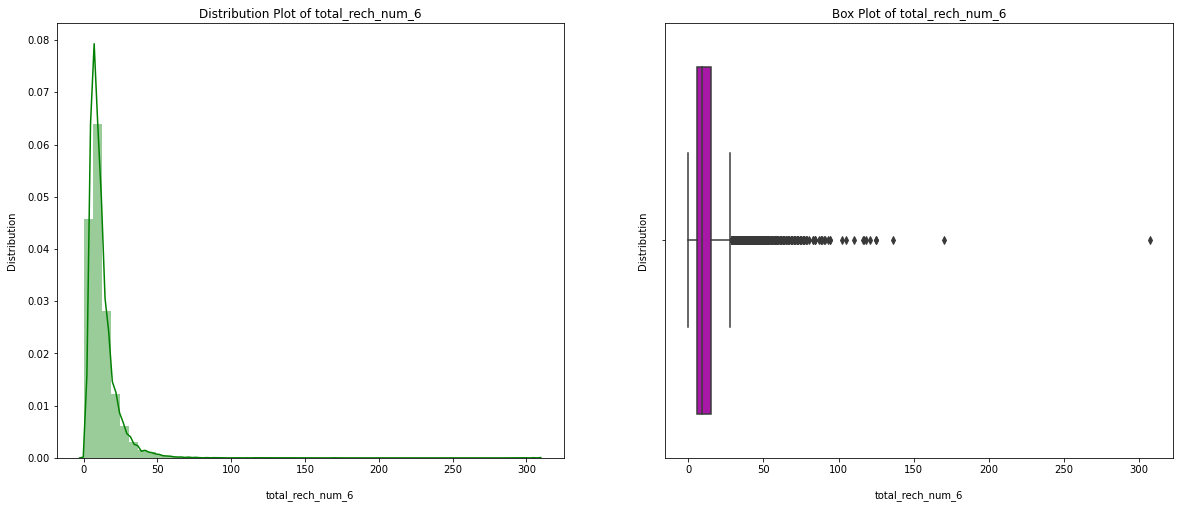

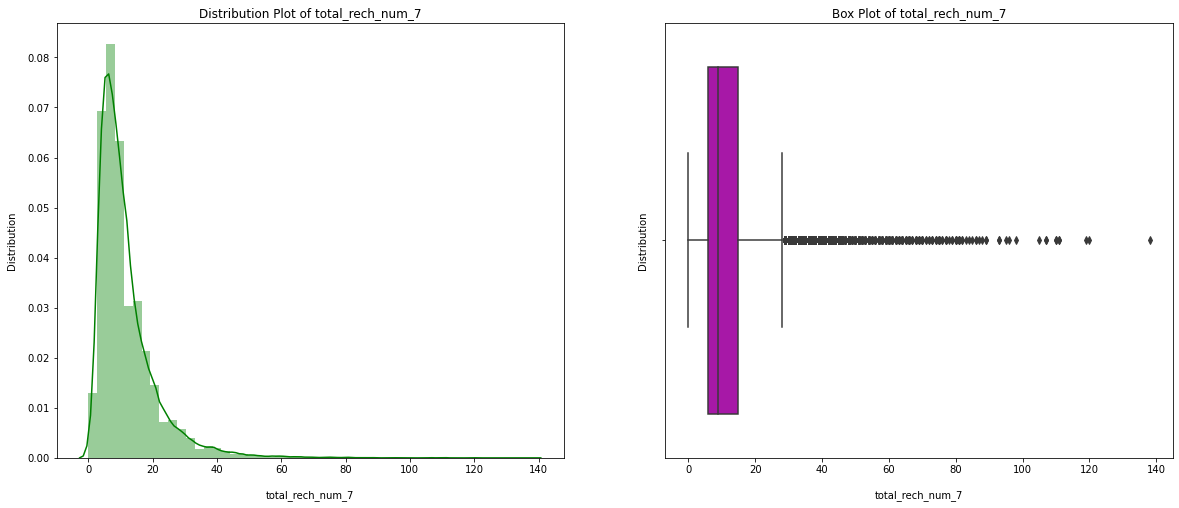

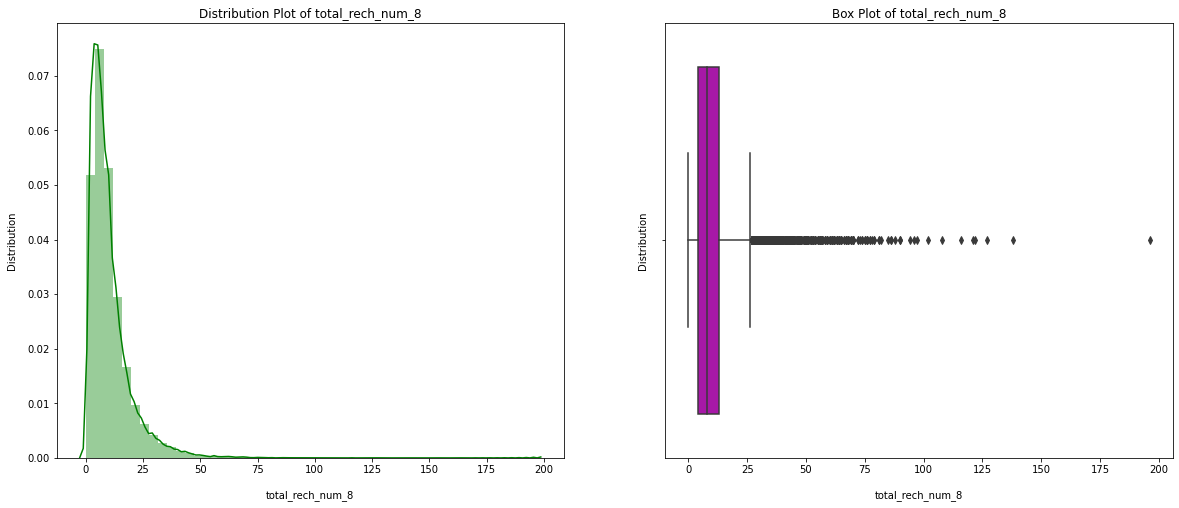

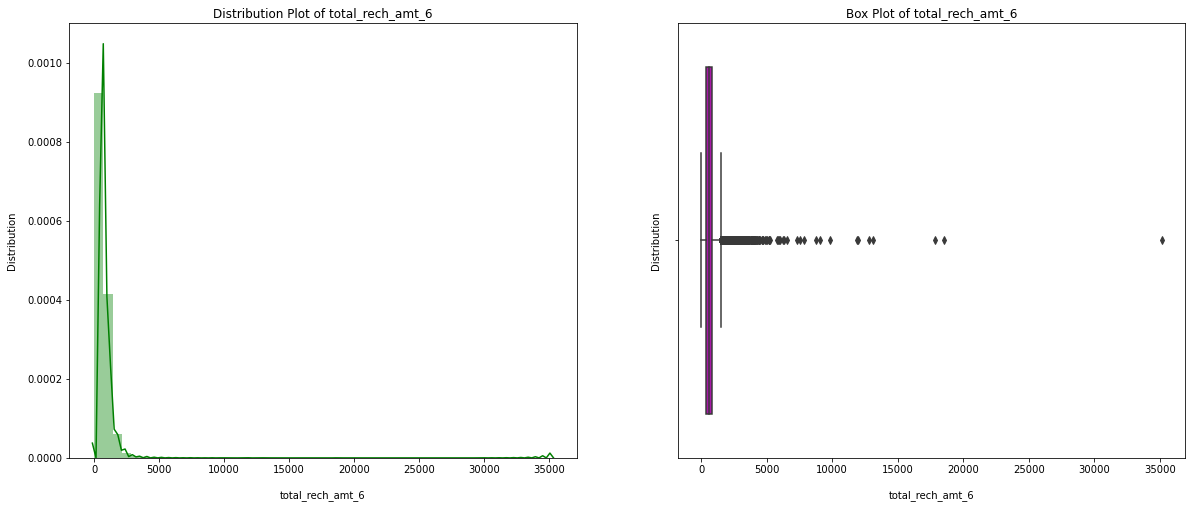

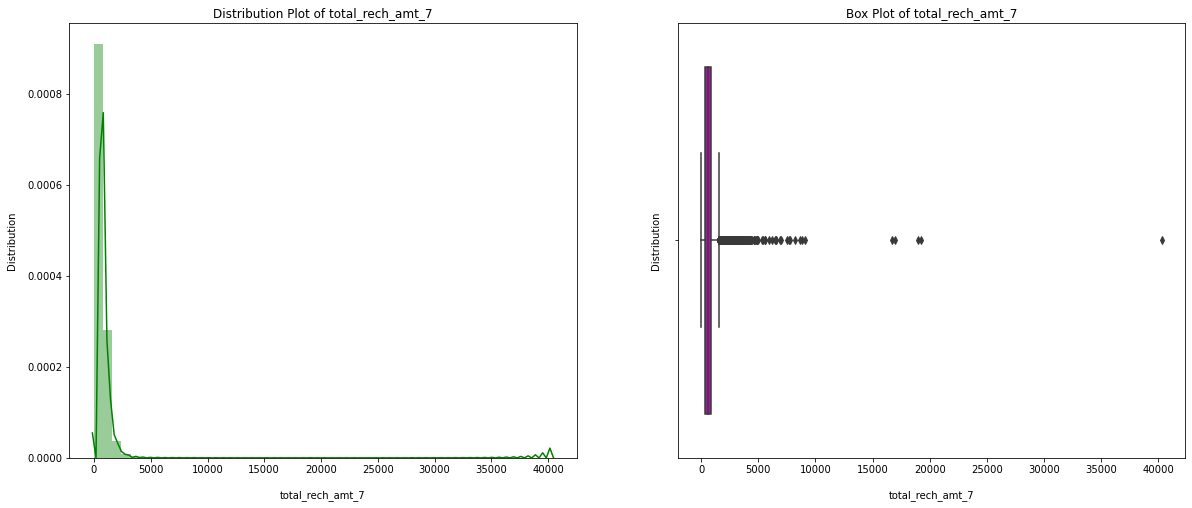

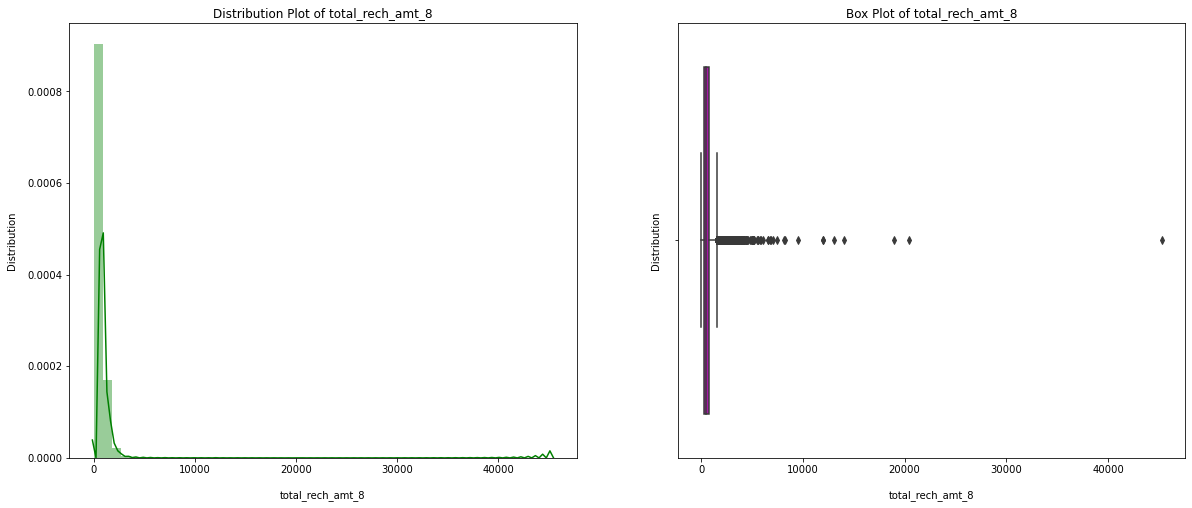

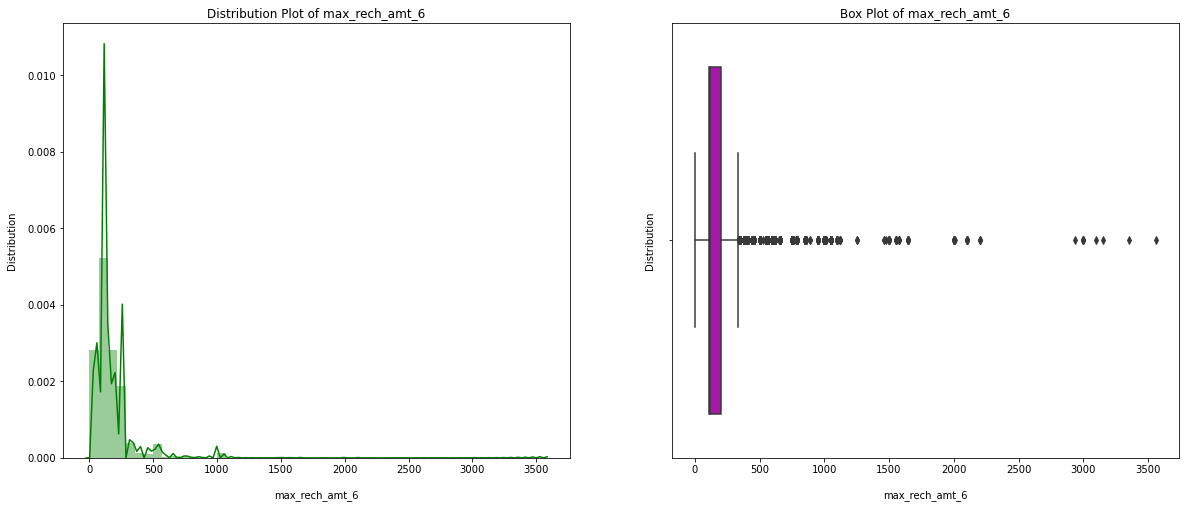

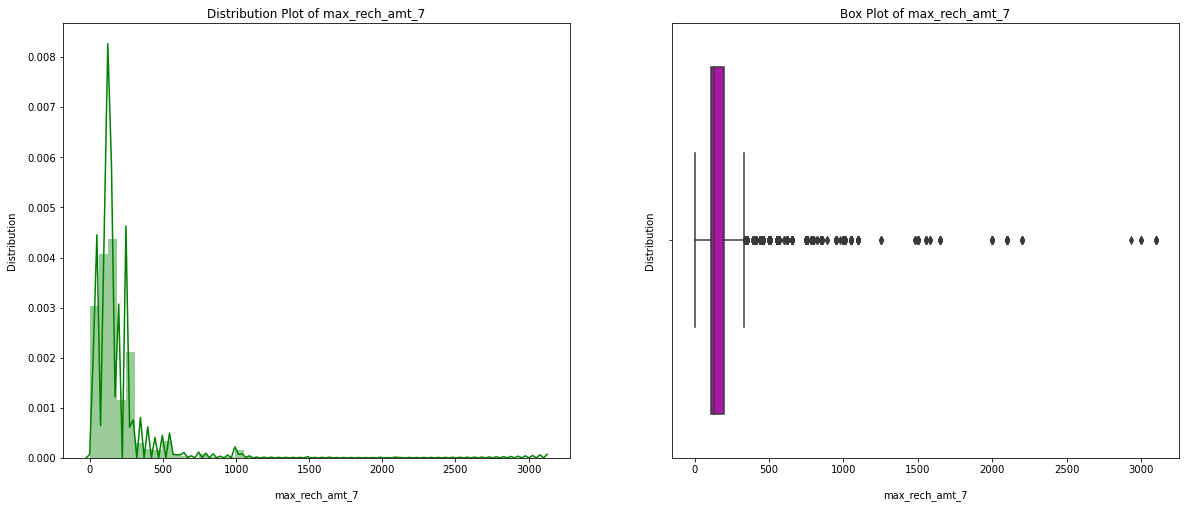

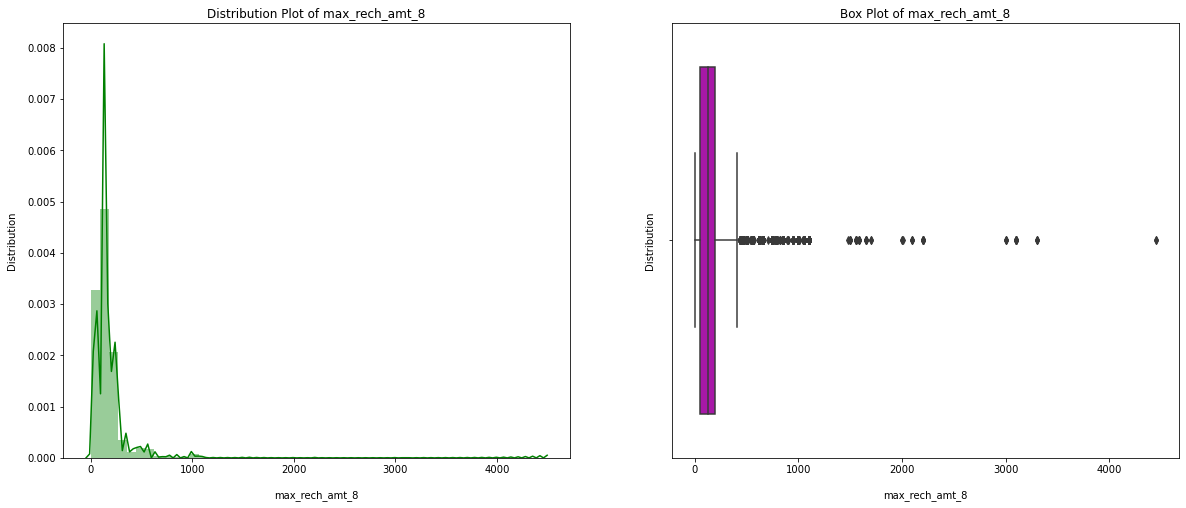

ValueError: could not convert string to float: '6/21/2014'

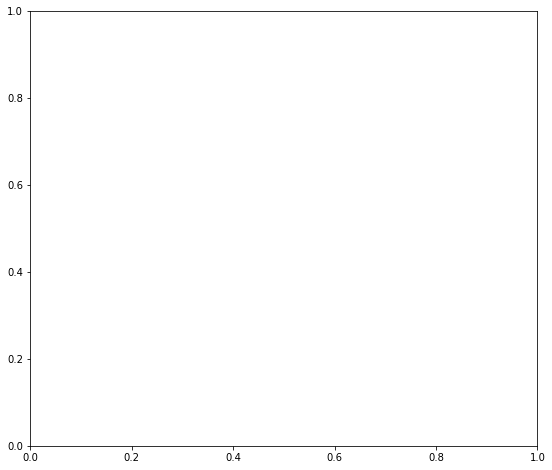

In [65]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
counter = 1

for col_list in telecom_data.columns:
    
    if col_list not in category_list:
        
        
        plot_univariate(figsize_x = 20,
                        figsize_y = 8,
                        subplot_x = 1,
                        subplot_y = 2,
                        xlabel = col_list,
                        ylabel = "Distribution",
                        x_axis = col_list,
                        data = telecom_data,
                        wspace = 0.2)

        counter += 1

## <font color = "purple"> Insights: </font>

The graph shows us that we have lot of **Outliers** which might give us the wrong analysis about the churn customers.
That is why we need to **Remove** these outliers in the later section.

In [66]:
telecom_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,1,1,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,1,604,40.45,51.86,0.00,0.0,712.0,540.0,0


AS we mentioned above there is drop in Customers in month 8 which might idicates us that number customers chrun in 8th is more then other months 

In [67]:
telecom_data.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
arpu_6,1.000000,0.682003,0.619778,0.343885,0.218888,0.190011,0.515151,0.344861,0.293097,0.126446,...,-0.198300,-0.141476,0.041807,0.059760,0.055983,0.112693,0.089954,-0.023367,0.003365,0.067199
arpu_7,0.682003,1.000000,0.767143,0.212713,0.321003,0.270779,0.355968,0.492669,0.397986,0.092642,...,-0.120627,-0.105054,0.030530,0.083410,0.101979,0.055333,-0.012701,0.091467,0.031556,-0.009176
arpu_8,0.619778,0.767143,1.000000,0.150736,0.232295,0.345283,0.279095,0.376009,0.523837,0.088353,...,-0.103201,0.006007,0.071158,0.147181,0.085783,0.074671,-0.002828,0.028811,0.130190,-0.156370
onnet_mou_6,0.343885,0.212713,0.150736,1.000000,0.751896,0.621407,0.088235,0.036756,0.033265,0.024091,...,-0.280500,-0.237539,-0.044659,-0.105456,-0.111882,-0.101619,-0.098761,-0.103078,-0.076547,0.072536
onnet_mou_7,0.218888,0.321003,0.232295,0.751896,1.000000,0.806452,0.052263,0.081527,0.073065,0.038215,...,-0.271858,-0.224463,-0.052596,-0.102797,-0.108569,-0.107797,-0.104092,-0.099973,-0.073818,0.018319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vbc_3g_6,0.112693,0.055333,0.074671,-0.101619,-0.107797,-0.084429,-0.085805,-0.099998,-0.072961,0.011297,...,0.268806,0.261153,0.016646,0.580045,0.669015,1.000000,0.269553,0.202498,0.159504,-0.030799
total_data_rech_amt_6,0.089954,-0.012701,-0.002828,-0.098761,-0.104092,-0.089457,-0.110227,-0.119530,-0.097821,-0.027255,...,0.239054,0.231764,-0.057114,0.167238,0.198266,0.269553,1.000000,0.465574,0.394341,-0.011590
total_data_rech_amt_7,-0.023367,0.091467,0.028811,-0.103078,-0.099973,-0.076219,-0.131420,-0.122544,-0.099903,-0.023489,...,0.324453,0.283648,-0.057897,0.225157,0.285414,0.202498,0.465574,1.000000,0.523508,-0.036976
total_data_rech_amt_8,0.003365,0.031556,0.130190,-0.076547,-0.073818,-0.055305,-0.089550,-0.088084,-0.050602,-0.016832,...,0.232146,0.286114,-0.041141,0.236967,0.172611,0.159504,0.394341,0.523508,1.000000,-0.068447


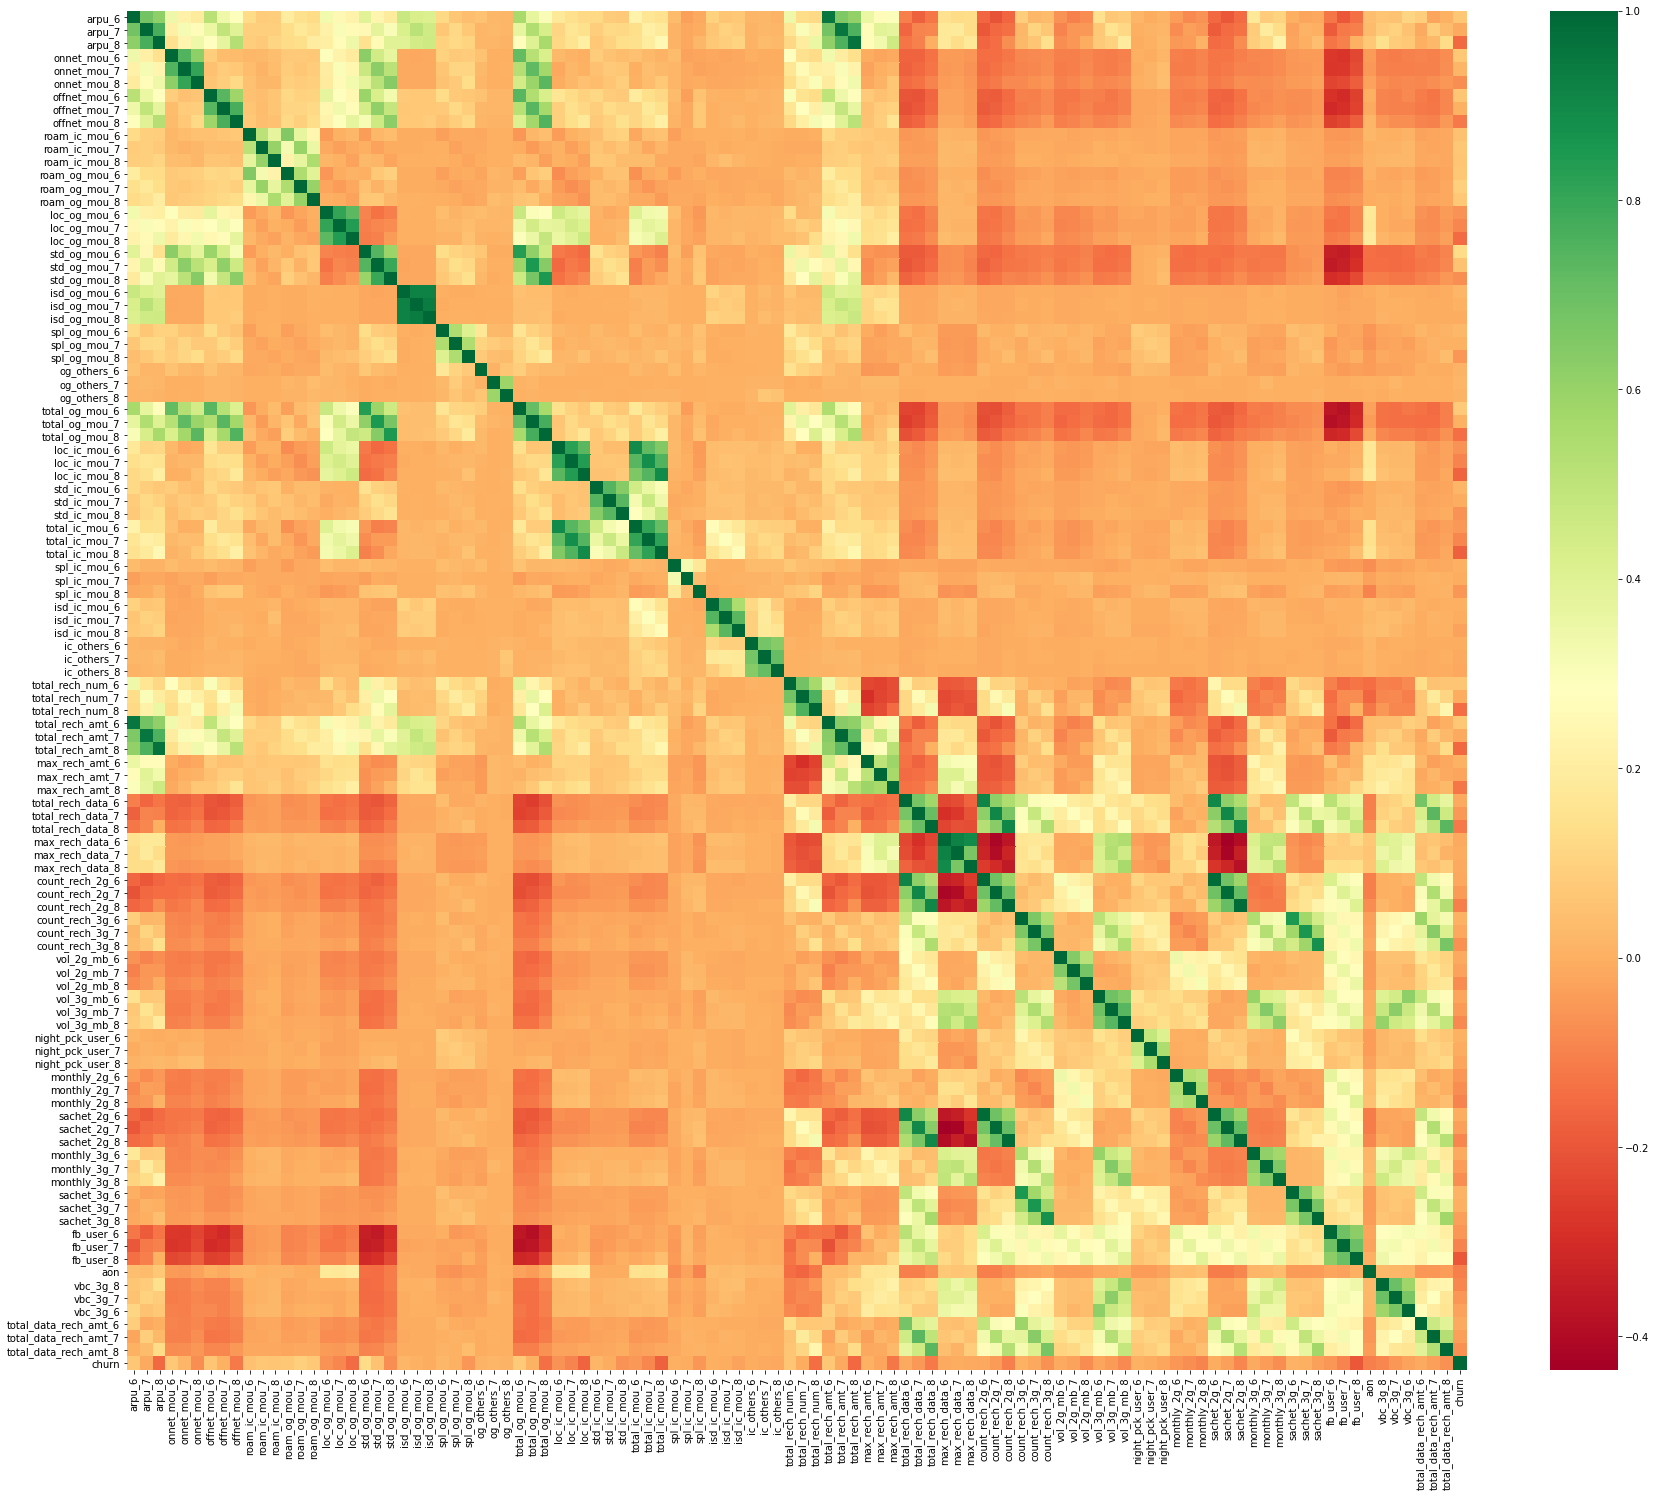

In [68]:
plt.figure(figsize = (30, 25))

sns.heatmap(telecom_data.corr(), cmap = "RdYlGn")

plt.show()

From the above Heatmap we can find **highly correlated features** from the data and we can use this features by extracting them.

In [69]:
corr_matrix = telecom_data.corr().abs()

upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


Total features with high correlation -  27


So there are **25 highly correalted features** present and the correaltion is above 80%.


## <font color = "Green"> Feature Engineering</font>

In [70]:
def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8] - df[good_phase_col]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [71]:
telecom_data = derive_good_action_phase(telecom_data, "arpu")

telecom_data = derive_good_action_phase(telecom_data, "onnet_mou")

telecom_data = derive_good_action_phase(telecom_data, "offnet_mou")

telecom_data = derive_good_action_phase(telecom_data, "roam_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "roam_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "loc_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "std_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "isd_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "spl_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "og_others")

telecom_data = derive_good_action_phase(telecom_data, "total_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "loc_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "std_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "spl_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "isd_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "ic_others")

telecom_data = derive_good_action_phase(telecom_data, "total_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_num")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_amt")

telecom_data = derive_good_action_phase(telecom_data, "max_rech_amt")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_data")

telecom_data = derive_good_action_phase(telecom_data, "max_rech_data")

telecom_data = derive_good_action_phase(telecom_data, "count_rech_2g")

telecom_data = derive_good_action_phase(telecom_data, "count_rech_3g")

telecom_data = derive_good_action_phase(telecom_data, "vol_2g_mb")

telecom_data = derive_good_action_phase(telecom_data, "vol_3g_mb")

telecom_data = derive_good_action_phase(telecom_data, "monthly_2g")

telecom_data = derive_good_action_phase(telecom_data, "sachet_2g")

telecom_data = derive_good_action_phase(telecom_data, "monthly_3g")

telecom_data = derive_good_action_phase(telecom_data, "sachet_3g")

telecom_data = derive_good_action_phase(telecom_data, "vbc_3g")

telecom_data = derive_good_action_phase(telecom_data, "total_data_rech_amt")

These are all Good and Action Phase variables.

In [72]:
telecom_data.head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,...,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,6/21/2014,7/16/2014,8/8/2014,0,0,0,1,1,1,968,...,0.0,0.0,1.0,0.0,0.0,0.0,50.600,-20.200,252.0,0.0
1,NaN,NaN,NaN,0,0,0,0,0,0,802,...,0.0,0.0,0.0,0.0,0.0,0.0,19.060,38.680,0.0,0.0
2,NaN,7/31/2014,8/23/2014,0,0,0,0,1,1,315,...,0.5,2.5,0.0,0.0,0.0,0.0,516.405,-495.375,177.0,30.0
3,NaN,NaN,NaN,0,0,0,0,0,0,720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
4,NaN,7/7/2014,8/6/2014,0,0,0,0,1,1,604,...,0.0,0.0,1.0,0.0,0.0,1.0,25.930,14.520,356.0,184.0


This divides the train data and test data.

**Train Data - 20876**

**Test Data - 8948**

## <font color = "Green"> Future Scope for this Project</font>

- Advanced Feature Engineering: Datawig can help generate new features by identifying complex patterns in the data during imputation, improving churn prediction.

- Handling Time-Series Data: By using Datawig’s RNN capabilities, we can handle missing values in time-series data, capturing customer behavior trends over time.

- Imputing Text Data: In the future, if we include textual data like customer feedback, Datawig can be used to fill in missing text entries, improving sentiment analysis.

- Improved Accuracy: Datawig’s advanced imputation techniques will lead to more accurate churn predictions by reducing bias from missing data.

- Continuous Learning: Datawig can be retrained periodically to adapt to new customer data, ensuring up-to-date and accurate imputations.

- Scaling for Larger Datasets: As the dataset grows, Datawig’s scalability will help handle larger, more complex datasets efficiently.

- Integration into ML Pipelines: Datawig can be seamlessly integrated into machine learning pipelines, automating data cleaning and improving model performance.